# **ES 114 Probability Lab Assignment - 4**

Name- Shardul Junagade

Roll no- 23110297

# **PDF and CDF of Continous and Discrete Random Variables**

In this notebook, I visualize various Probability Density Functions (PDFs) and Cumulative Distribution Functions (CDFs) for both continuous and discrete random variables.

**Continuous Random Variables**:
1. Uniform Distribution
2. Gaussian/Normal Distribution
3. Exponential Distribution
4. Cauchy Distribution
5. Laplacian Distribution
6. Rayleigh Distribution

**Discrete Random Variables (from Lab Assignment 3)**:
1. Discrete Uniform Distribution
2. Bernoulli Distribution
3. Binomial Distribution
4. Poisson Distribution
5. Geometric Distribution

Each section includes the implementation and plotting of the respective PDFs and CDFs, providing a comprehensive understanding of these distributions.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Helper Functions

In [2]:
def factorial(n):
  fac=1
  for i in range(1,n+1):
    fac*=i
  return fac

def combination(n,r):
  return factorial(n)/(factorial(r)*factorial(n-r))

## PDFs and CDFs for Continuous Random Variables

### Uniform Distribution

The Uniform Distribution is used to model situations where all values within a specific range, [a,b], are equally likely to occur. In this case, the probability of the random variable 𝑥 falling within any subinterval of [a,b] is the same, as long as the subinterval lengths are equal. The probability density function (PDF), $ p_X(x) $, is defined as:

$$ p_X(x) = \left\{ \begin{array}{ll} \frac{1}{b - a} & ;\ x \in [a, b] \\ 0 & \text{; otherwise} \\ \end{array} \right. $$

The cumulative distribution function (CDF), $F_X(x)$ represents the probability that the random variable 𝑥 is less than or equal to a given value. To calculate it, we integrate the PDF from ${-\infty}$ to 𝑥.

$$F_X(x) = \int_{-\infty}^x p_X(x) \ dx$$

For a uniform distribution, this simplifies to:

$$ \ F_X(x) =   \left\{
\begin{array}{ll}
    0 &;\ x < a\\
    \frac{x - a}{b - a} & ; \ x \in [a, b) \\
    1 & ; \ x \ge b \\
\end{array}
\right.  $$

**PDF  and CDF of Uniform Distribution**

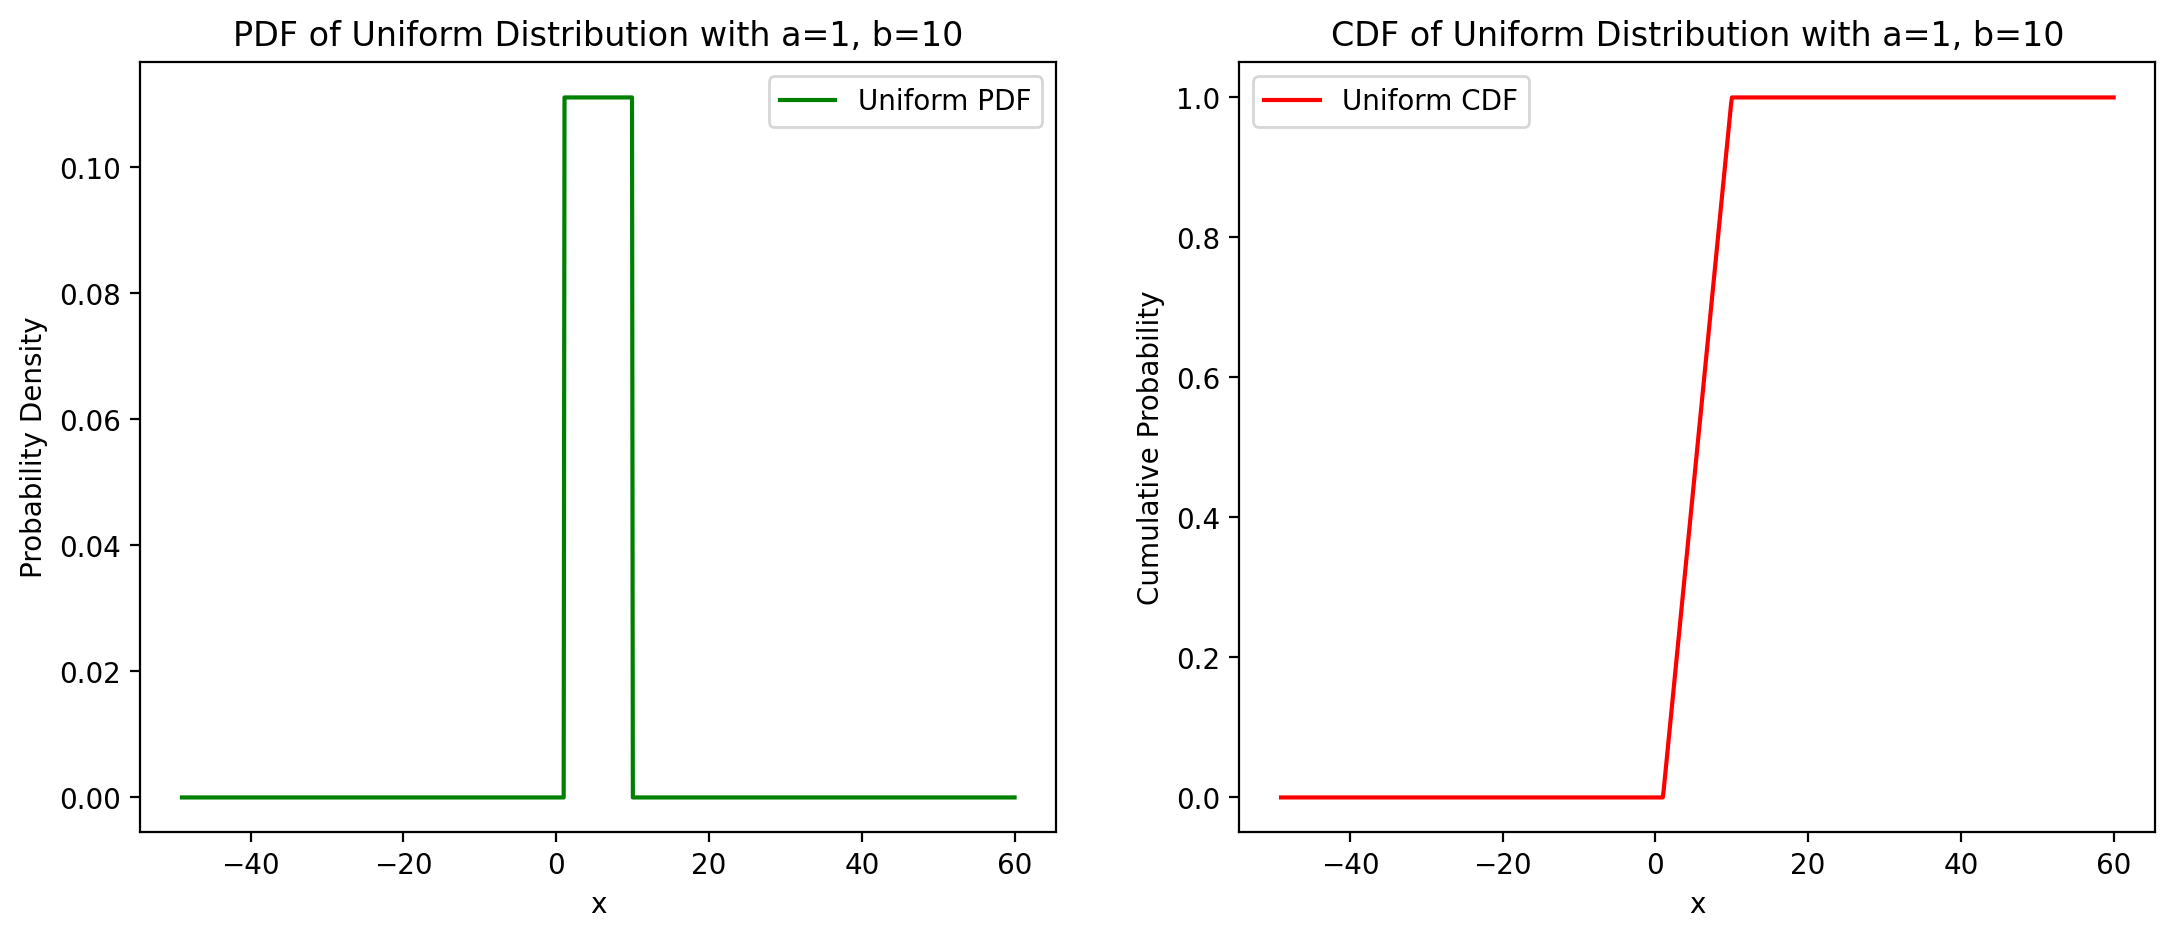

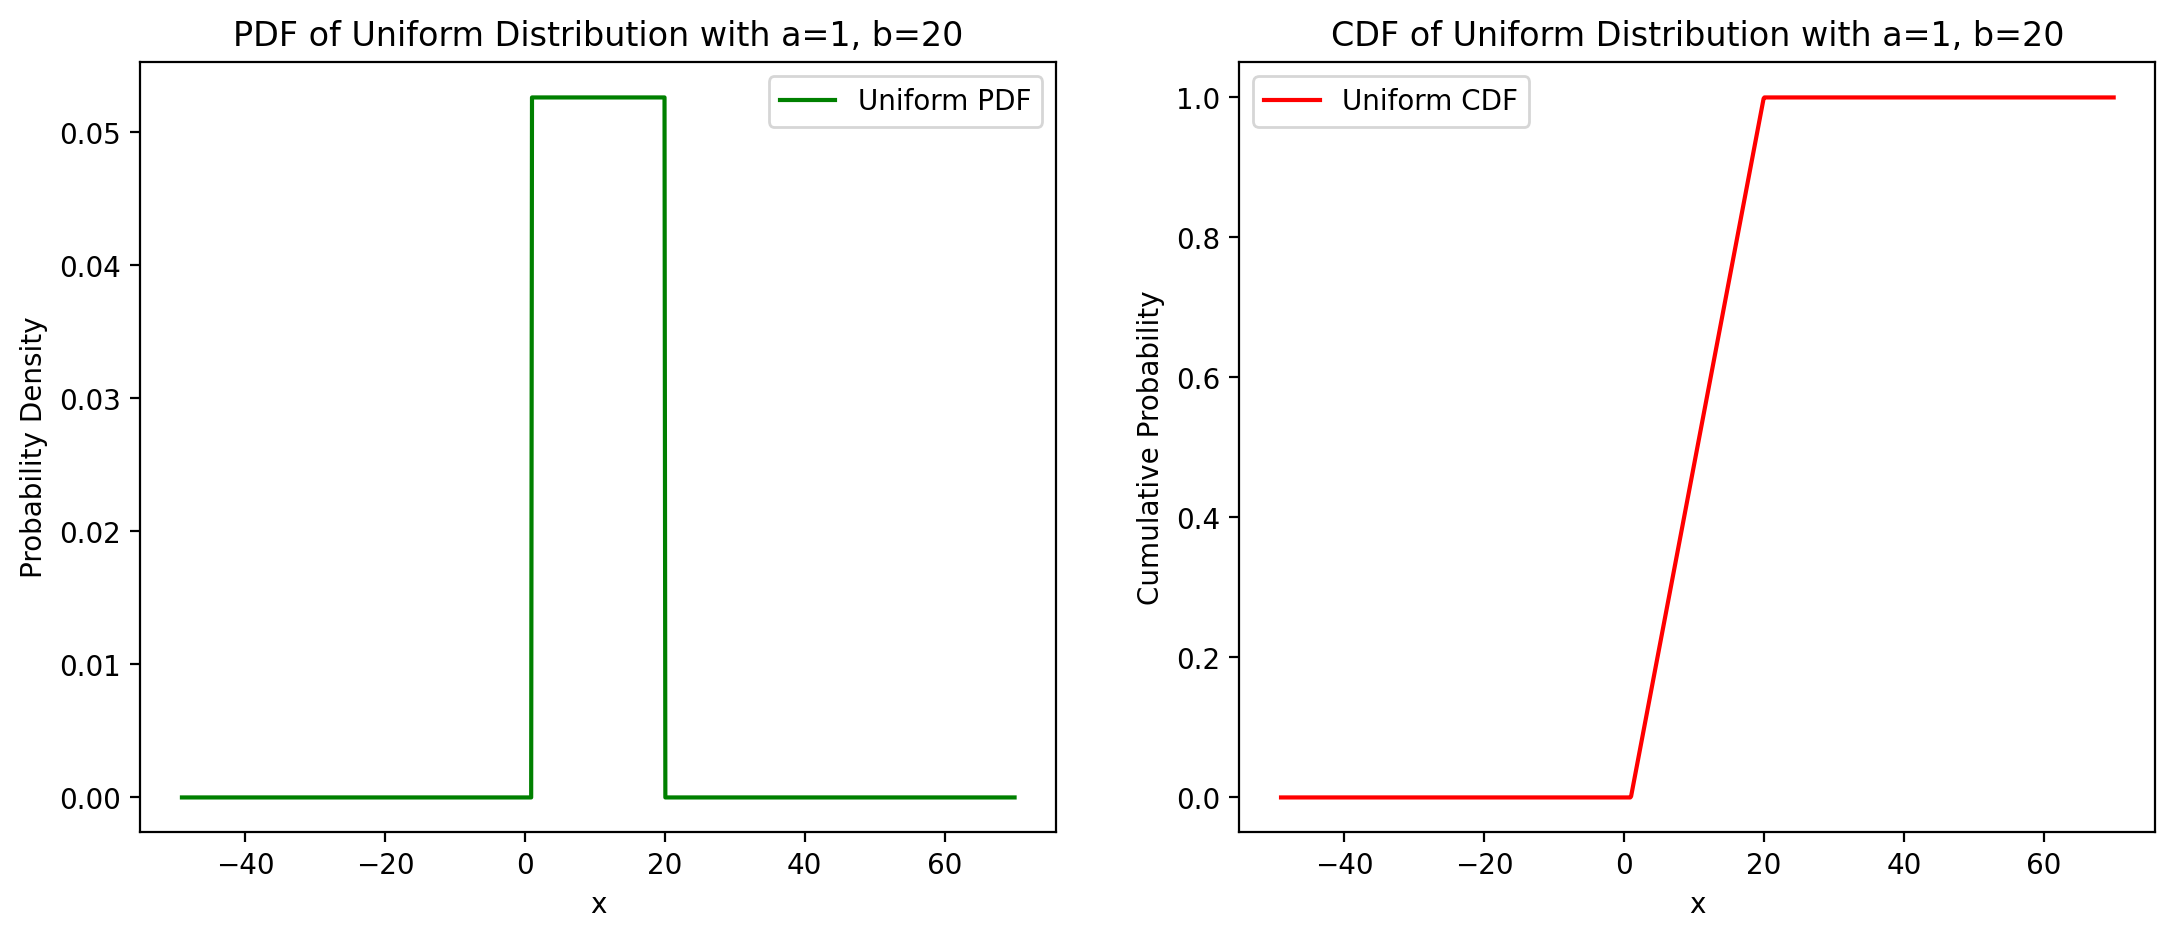

In [3]:
def uniform_prob(x,a,b):
  if x>=a and x<=b:
    return 1/(b-a)
  else:
    return 0

def uniform_pdf(a, b):
  X = np.linspace(a - 50, b + 50, 1000)
  pdf = np.array([uniform_prob(x, a, b) for x in X])
  return X, pdf

def uniform_cdf_val(x,a,b):
  if x>=a and x<=b:
    return (x-a)/(b-a)
  elif x>b:
    return 1
  else:
    return 0

def uniform_cdf(a, b):
  X = np.linspace(a - 50, b + 50, 1000)
  cdf = np.array([uniform_cdf_val(x, a, b) for x in X])
  return X, cdf


# plot pdf and cds in 1 subplot side by side
def plot_uniform_pdf_cdf(a, b):
  fig, ax = plt.subplots(1, 2, figsize=(13, 5))
  X, pdf = uniform_pdf(a, b)
  ax[0].plot(X, pdf, color='g', label="Uniform PDF")
  ax[0].set_title(f'PDF of Uniform Distribution with a={a}, b={b}')
  ax[0].set_xlabel('x')
  ax[0].set_ylabel('Probability Density')
  ax[0].legend()
  X, cdf = uniform_cdf(a, b)
  ax[1].plot(X, cdf, color='r', label="Uniform CDF")
  ax[1].set_title(f'CDF of Uniform Distribution with a={a}, b={b}')
  ax[1].set_xlabel('x')
  ax[1].set_ylabel('Cumulative Probability')
  ax[1].legend()
  plt.show()
  
plot_uniform_pdf_cdf(1, 10)
plot_uniform_pdf_cdf(1, 20)


In [4]:
# #using cummulative sum method for verifying

# def uniform_cdf_val2(x,a,b):
#   if x>=a and x<=b:
#     return (x-a)/(b-a)
#   else:
#     return 0

# def uniform_cdf2(a, b, plot_cdf=True):
#   X = np.linspace(a - 50, b + 50, 1000)
#   Y = np.array([uniform_cdf_val2(x, a, b) for x in X])
#   cdf = np.cumsum(Y) / np.sum(Y)
#   if plot_cdf:
#     plt.plot(X, cdf, color='g', label="Uniform CDF")
#     plt.title(f"Uniform Continuous Distribution Function with a={a}, b={b}")
#     plt.xlabel("Random Variable X")
#     plt.ylabel("Cumulative Distribution Function")
#     plt.legend()
#     plt.show()
#   return X, cdf

# # Example Plots
# X1, cdf1 = uniform_cdf2(1, 10)
# X2, cdf2 = uniform_cdf2(1, 20)

### Gaussian/Normal Distribution

The **Normal Distribution**, also known as the **Gaussian Distribution**, is a continuous probability distribution that describes a bell-shaped curve symmetric about its mean, $\mu$. It is widely used in statistics to represent real-world variables that cluster around a central value. The probability density function (PDF) of the normal distribution is given by:

$$
p_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

Here:
- $\mu$: the mean (center of the distribution),
- $\sigma$: the standard deviation (controls the spread of the distribution).

The **Cumulative Distribution Function (CDF)**, $F_X(x)$, gives the probability that a random variable $x$ is less than or equal to a given value. It is defined as:

$$
F_X(x) = \int_{-\infty}^x p_X(t) \, dt
$$

Since there is no closed-form expression for the normal CDF, it is typically evaluated numerically or using special functions.


**PDF and CDF of Normal Distribution**

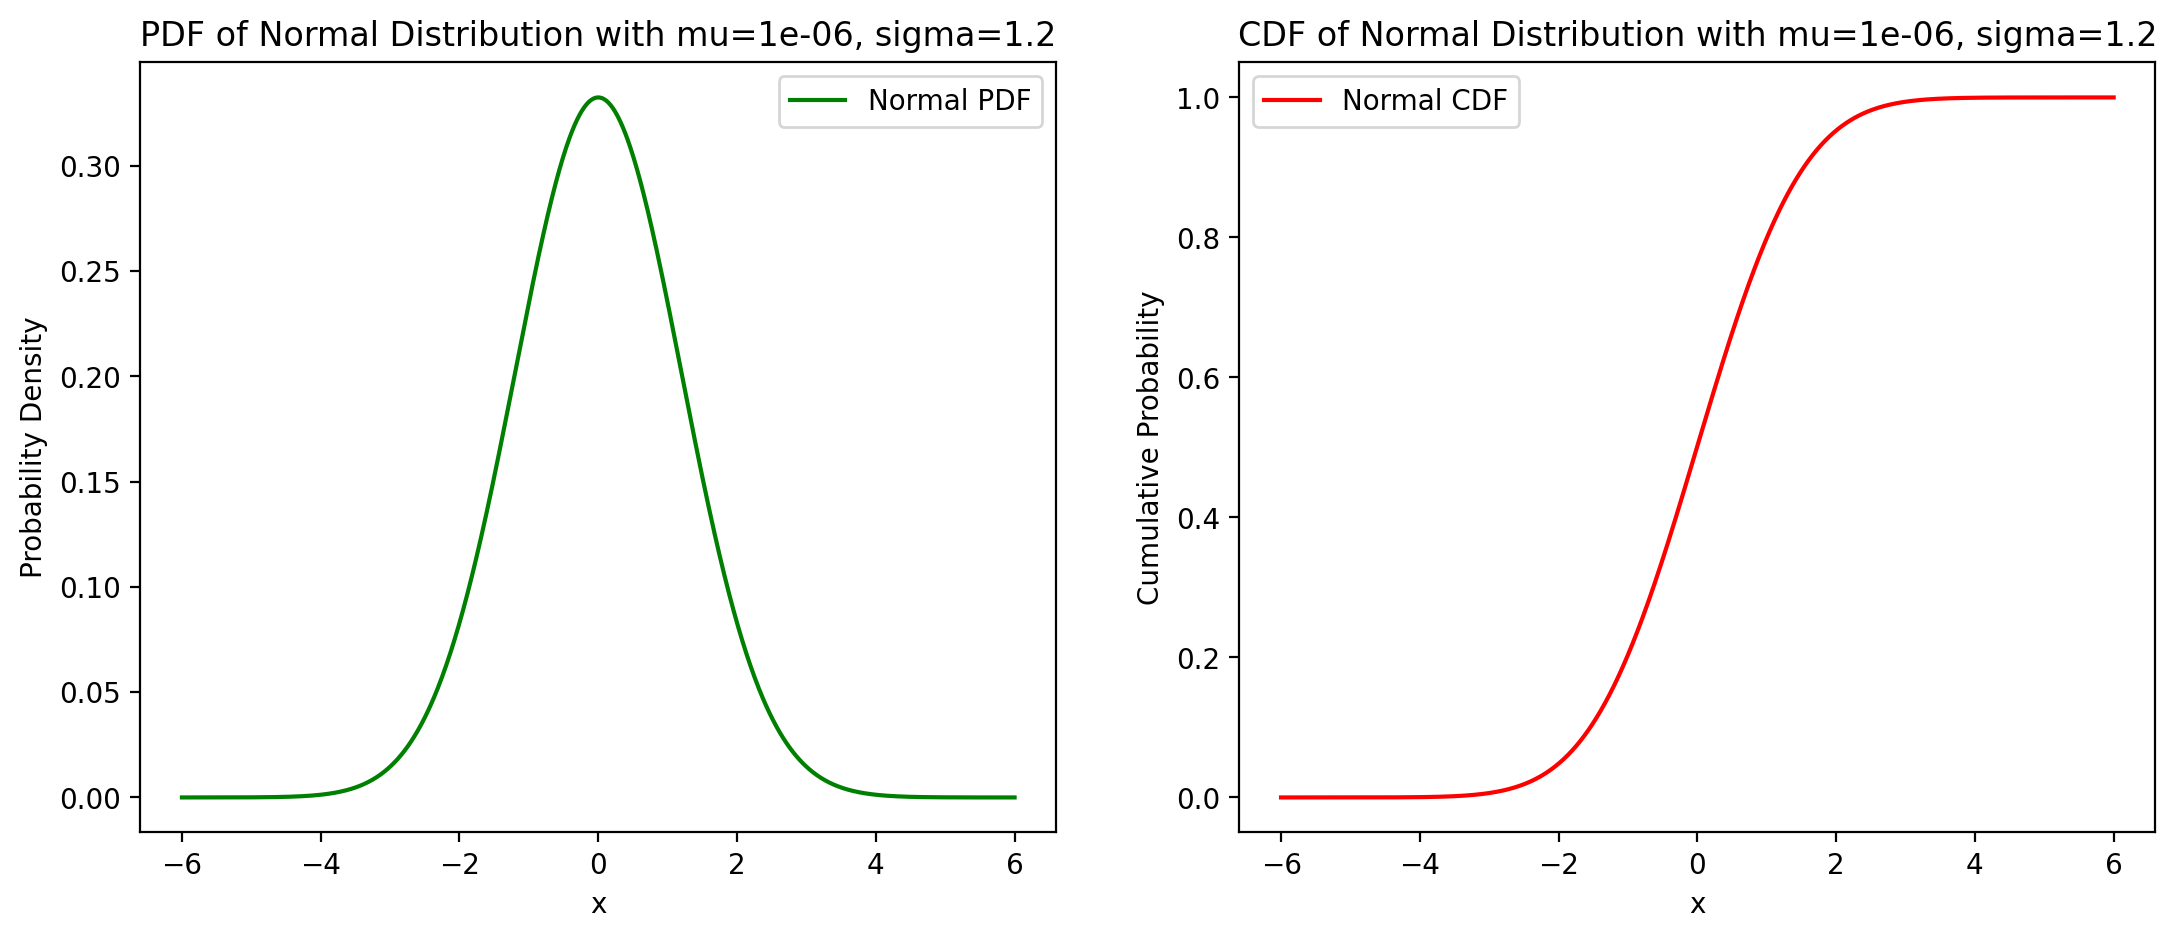

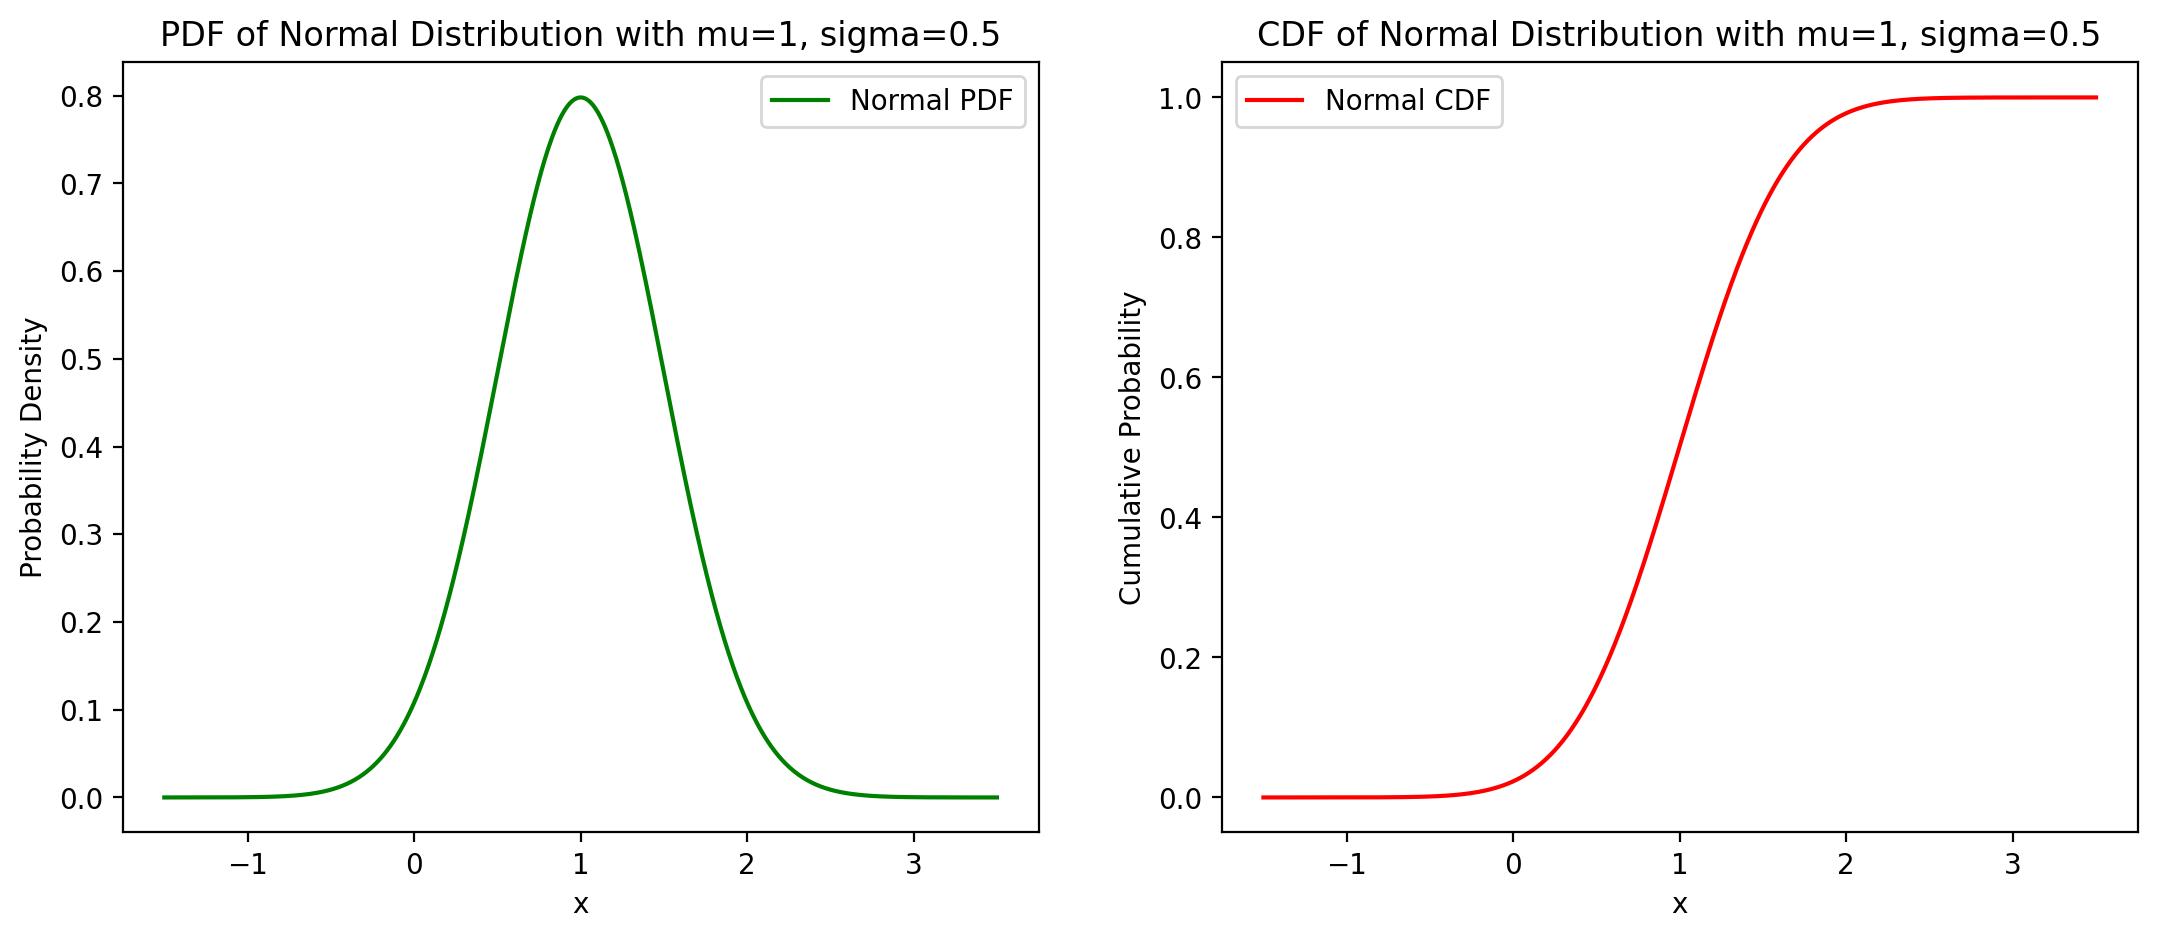

In [5]:
def normal_prob(x,mu,sigma):
  return (1/((np.sqrt(2*np.pi))*sigma))*np.exp(-0.5*(((x-mu)/sigma)**2))

def normal_pdf(mu, sigma):
  X = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)
  pdf = np.array([normal_prob(x, mu, sigma) for x in X])
  return X, pdf

# using cummulative sum method as closed form expression is not available
def normal_cdf(mu,sigma):
  X = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)
  Y=np.array([normal_prob(x,mu,sigma) for x in X])
  cdf=np.cumsum(Y)/np.sum(Y)
  return X, cdf


# plot pdf and cds in 1 subplot side by side
def plot_normal_pdf_cdf(mu, sigma):
  fig, ax = plt.subplots(1, 2, figsize=(13, 5))
  X, pdf = normal_pdf(mu, sigma)
  ax[0].plot(X, pdf, color='g', label="Normal PDF")
  ax[0].set_title(f'PDF of Normal Distribution with mu={mu}, sigma={sigma}')
  ax[0].set_xlabel('x')
  ax[0].set_ylabel('Probability Density')
  ax[0].legend()
  X, cdf = normal_cdf(mu, sigma)
  ax[1].plot(X, cdf, color='r', label="Normal CDF")
  ax[1].set_title(f'CDF of Normal Distribution with mu={mu}, sigma={sigma}')
  ax[1].set_xlabel('x')
  ax[1].set_ylabel('Cumulative Probability')
  ax[1].legend()
  plt.show()
  
  
plot_normal_pdf_cdf(0.000001,1.2)
plot_normal_pdf_cdf(1,0.5)

### Exponential Distribution

The **Exponential Distribution** is commonly used to model the time until an event occurs, such as the lifespan of a device or the time between arrivals in a queue. It is characterized by a rate parameter $\lambda > 0$, which determines the speed of decay. The probability density function (PDF) for the exponential distribution is given by:

$$
p_X(x) = 
\begin{cases} 
\lambda e^{-\lambda x} & \text{if } x \ge 0 \\ 
0 & \text{otherwise}
\end{cases}
$$

Here, $\lambda$ is the rate parameter, representing the inverse of the mean.

The **Cumulative Distribution Function (CDF)**, $F_X(x)$, represents the probability that the random variable $X$ is less than or equal to a given value $x$. It is calculated by integrating the PDF from $-\infty$ to $x$:

$$
F_X(x) = \int_{-\infty}^x p_X(x) \, dx
$$

For the exponential distribution, this simplifies to:

$$
F_X(x) = 
\begin{cases} 
1 - e^{-\lambda x} & \text{if } x \ge 0 \\ 
0 & \text{otherwise}
\end{cases}
$$

In simple terms:
- For $x < 0$, the CDF is 0, as the exponential distribution is defined only for non-negative values.
- For $x \ge 0$, the CDF gradually increases from 0 to 1 as $x$ grows, with the rate of increase determined by $\lambda$.

Key properties of the exponential distribution include:
1. **Memorylessness**: The probability of an event occurring in the future does not depend on how much time has already elapsed.
2. **Mean and Variance**: The mean is $\frac{1}{\lambda}$, and the variance is $\frac{1}{\lambda^2}$.


**PDF and CDF for Exponential Distribution**

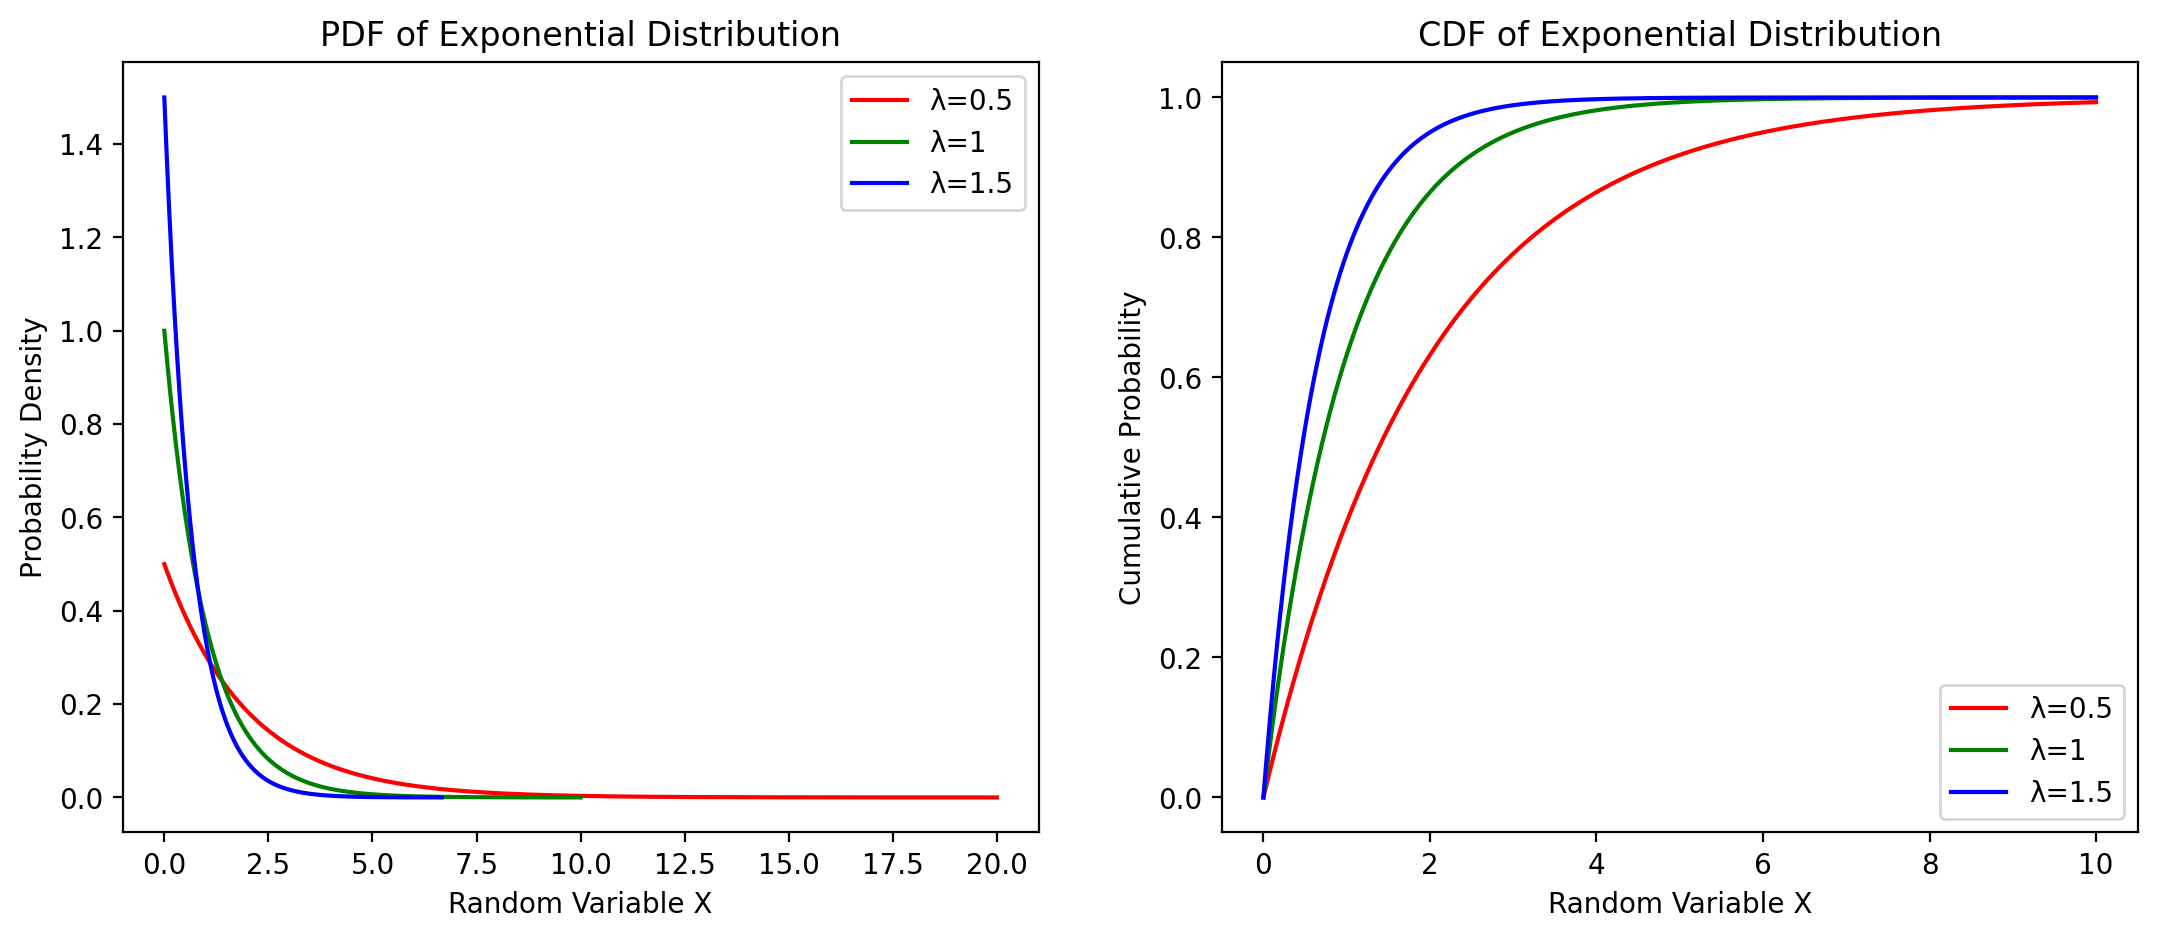

In [6]:
def exp_prob(x, lambd):
    return lambd * (np.exp(-lambd * x))

def exp_pdf(lambd, col, ax=None):
    X = np.linspace(0, 10 / lambd, 1000)
    pdf = np.array([exp_prob(x, lambd) for x in X])
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(X, pdf, color=col, label="λ=" + str(lambd))
    ax.set_title(f"PDF of Exponential Distribution")
    ax.set_xlabel("Random Variable X")
    ax.set_ylabel("Probability Density")
    ax.legend()
    return X, pdf

def exp_cdf_val(x, lambd):
    return 1 - np.exp(-lambd * x)

def exp_cdf(lambd, col, ax=None):
    X = np.linspace(0, 10, 1000)
    cdf = np.array([exp_cdf_val(x, lambd) for x in X])
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(X, cdf, color=col, label="λ=" + str(lambd))
    ax.set_title(f"CDF of Exponential Distribution")
    ax.set_xlabel("Random Variable X")
    ax.set_ylabel("Cumulative Probability")
    ax.legend()
    return X, cdf

fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# Plot PDF
x1, pdf1 = exp_pdf(0.5, "r", ax[0])
x2, pdf2 = exp_pdf(1, "g", ax[0])
x3, pdf3 = exp_pdf(1.5, "b", ax[0])

# Plot CDF
x1, cdf1 = exp_cdf(0.5, "r", ax[1])
x2, cdf2 = exp_cdf(1, "g", ax[1])
x3, cdf3 = exp_cdf(1.5, "b", ax[1])

plt.show()


In [7]:
# # using cummulative sum method for verifying

# def exp_cdf_val2(x,lambd):
#   return lambd*(np.exp(-lambd*x))

# def exp_cdf2(lambd,col):
#   X=np.linspace(0,10,1000)
#   Y=np.array([exp_cdf_val2(x,lambd) for x in X])
#   cdf=np.cumsum(Y)/np.sum(Y)
#   plt.plot(X,cdf, color=col, label="λ="+str(lambd))
#   plt.title(f"Exponential Continuous Distribution Function")
#   plt.xlabel("Random Variable X")
#   plt.ylabel("CDF")
#   plt.legend()
#   plt.show()

### Cauchy Distribution

The **Cauchy Distribution** is a continuous probability distribution that is often used in physics and other fields to model systems with heavy tails or distributions with undefined mean and variance. It is characterized by two parameters:
- $x_0$: the location parameter (the peak of the distribution),
- $r > 0$: the scale parameter (controls the spread of the distribution).

The probability density function (PDF) of the Cauchy distribution is given by:

$$
p_X(x) = \frac{1}{\pi r \big(1 + \big(\frac{x - x_0}{r} \big)^2 \big) }
$$

Here:
- $x_0$ determines the center of the distribution,
- $r$ determines the width of the peak.

The **Cumulative Distribution Function (CDF)**, $F_X(x)$, represents the probability that the random variable $X$ is less than or equal to $x$. It is computed by integrating the PDF from $-\infty$ to $x$:

$$
F_X(x) = \int_{-\infty}^x p_X(x) \, dx
$$

For the Cauchy distribution, this simplifies to:

$$
F_X(x) = \frac{1}{\pi} \tan^{-1}\left(\frac{x - x_0}{r}\right) + \frac{1}{2}
$$

In simple terms:
- The PDF describes a symmetric, bell-shaped curve centered at $x_0$ but with heavier tails than the normal distribution.
- The CDF describes the cumulative probability up to a given point $x$, which grows gradually from 0 to 1.

Key properties of the Cauchy distribution include:
1. **Heavy Tails**: The tails of the distribution are heavier compared to the normal distribution, making extreme values more likely.
2. **Undefined Mean and Variance**: The mean and variance of the Cauchy distribution are undefined due to the behavior of its tails.
3. **Symmetry**: The distribution is symmetric around $x_0$.


**PDF and CDF for Cauchy Distribution**

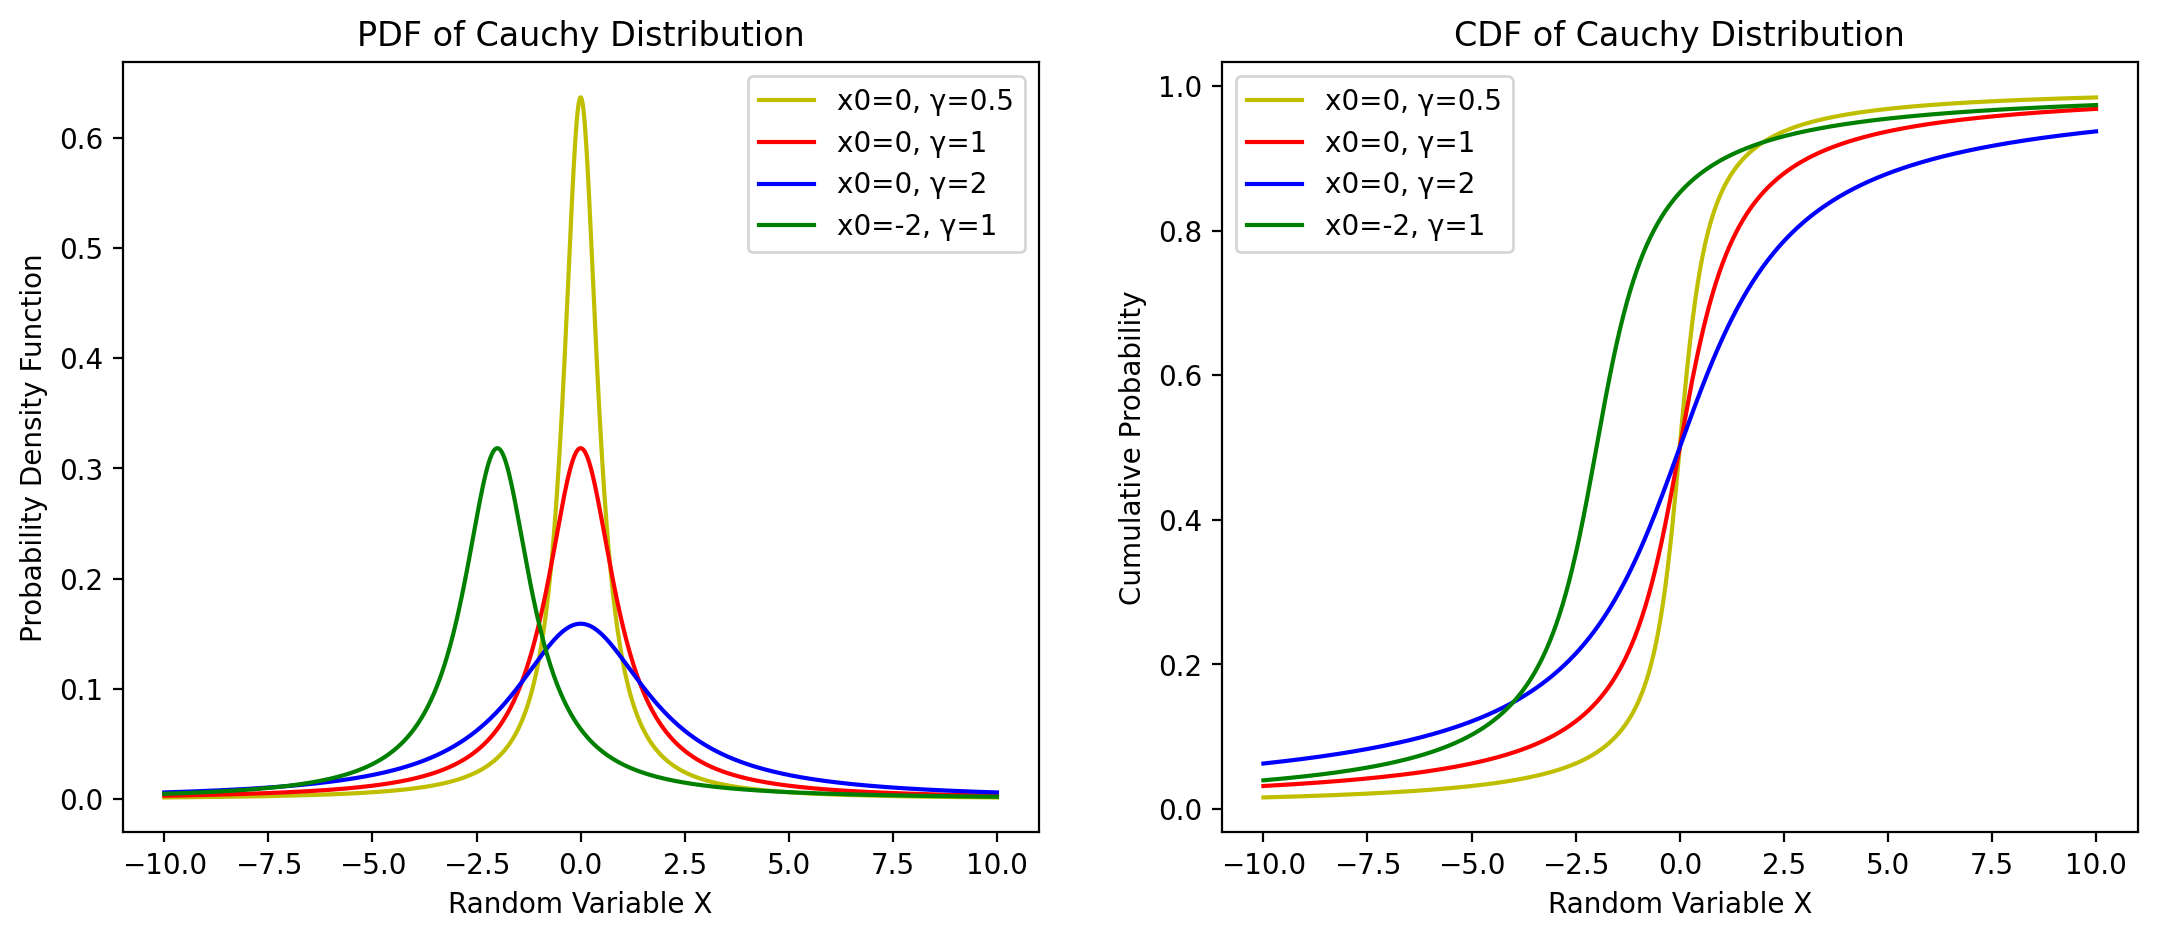

In [8]:
def cauchy_prob(x, x0, gamma):
  return 1 / (np.pi * gamma * (1 + ((x - x0) / gamma) ** 2))

def cauchy_pdf(x0, gamma, col, ax=None):
  X = np.linspace(-10, 10, 1000)
  pdf = np.array([cauchy_prob(x, x0, gamma) for x in X])
  if ax is None:
    fig, ax = plt.subplots()
  ax.plot(X, pdf, color=col, label="x0=" + str(x0) + ", γ=" + str(gamma))
  ax.set_title(f"PDF of Cauchy Distribution")
  ax.set_xlabel("Random Variable X")
  ax.set_ylabel("Probability Density Function")
  ax.legend()
  return X, pdf

def cauchy_cdf_val(x, x0, gamma):
  return np.arctan((x - x0) / gamma) / np.pi + 1 / 2

def cauchy_cdf(x0, gamma, col, ax=None):
  X = np.linspace(-10, 10, 1000)
  cdf = np.array([cauchy_cdf_val(x, x0, gamma) for x in X])
  if ax is None:
    fig, ax = plt.subplots()
  ax.plot(X, cdf, color=col, label="x0=" + str(x0) + ", γ=" + str(gamma))
  ax.set_title(f"CDF of Cauchy Distribution")
  ax.set_xlabel("Random Variable X")
  ax.set_ylabel("Cumulative Probability")
  ax.legend()
  return X, cdf



fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# Plot PDF
x1, pdf1 = cauchy_pdf(0, 0.5, 'y', ax[0])
x2, pdf2 = cauchy_pdf(0, 1, 'r', ax[0])
x3, pdf3 = cauchy_pdf(0, 2, 'b', ax[0])
x4, pdf4 = cauchy_pdf(-2, 1, 'g', ax[0])

# Plot CDF
x1, cdf1 = cauchy_cdf(0, 0.5, 'y', ax[1])
x2, cdf2 = cauchy_cdf(0, 1, 'r', ax[1])
x3, cdf3 = cauchy_cdf(0, 2, 'b', ax[1])
x4, cdf4 = cauchy_cdf(-2, 1, 'g', ax[1])

plt.show()


In [9]:
# # using cummulative sum method for verifying and validating

# def cauchy_cdf_val2(x,x0,gamma):
#   return 1/(np.pi*gamma*(1+((x-x0)/gamma)**2))

# def cauchy_cdf2(x0,gamma,col):
#   X=np.linspace(-10,10,1000)
#   Y=np.array([cauchy_cdf_val2(x,x0,gamma) for x in X])
#   cdf=np.cumsum(Y)/np.sum(Y)
#   plt.plot(X,cdf, color=col, label="x0="+str(x0)+", γ="+str(gamma))
#   plt.title(f"Cauchy Continuous Distribution Function")
#   plt.xlabel("Random Variable X")
#   plt.ylabel("CDF")
#   plt.legend()

### Laplacian Distribution

The **Laplacian Distribution** is a continuous probability distribution commonly used to model data with sharp peaks and heavy tails. It is characterized by two parameters:
- $\mu$: the location parameter (the peak of the distribution),
- $b > 0$: the scale parameter (controls the spread of the distribution).

The probability density function (PDF) of the Laplacian distribution is given by:

$$
p_X(x) = \frac{1}{2b} \ e^{-\frac{|x - \mu|}{b}}
$$

Here:
- $\mu$ represents the center of the distribution,
- $b$ determines how quickly the distribution decays away from the center.

The **Cumulative Distribution Function (CDF)**, $F_X(x)$, represents the probability that the random variable $X$ is less than or equal to $x$. It is computed by integrating the PDF from $-\infty$ to $x$:

$$
F_X(x) = \int_{-\infty}^x p_X(x) \, dx
$$

For the Laplacian distribution, this simplifies to:

$$
F_X(x) = 
\begin{cases} 
\frac{1}{2} e^{\frac{x - \mu}{b}} & \text{if } x < \mu \\ 
1 - \frac{1}{2} e^{-\frac{x - \mu}{b}} & \text{if } x \ge \mu
\end{cases}
$$

In simple terms:
- For $x < \mu$, the CDF grows exponentially as $x$ approaches $\mu$.
- For $x \ge \mu$, the CDF increases towards 1, also at an exponential rate, but slower than for $x < \mu$.

Key properties of the Laplacian distribution include:
1. **Sharp Peak**: The PDF has a sharp peak at $\mu$, making it suitable for data with a strong central tendency.
2. **Heavy Tails**: The distribution decays more slowly in the tails compared to the normal distribution, which accounts for the presence of outliers.
3. **Symmetry**: The distribution is symmetric about $\mu$, with equal probability in both directions.


**PDF and CDF for Laplacian Distribution**

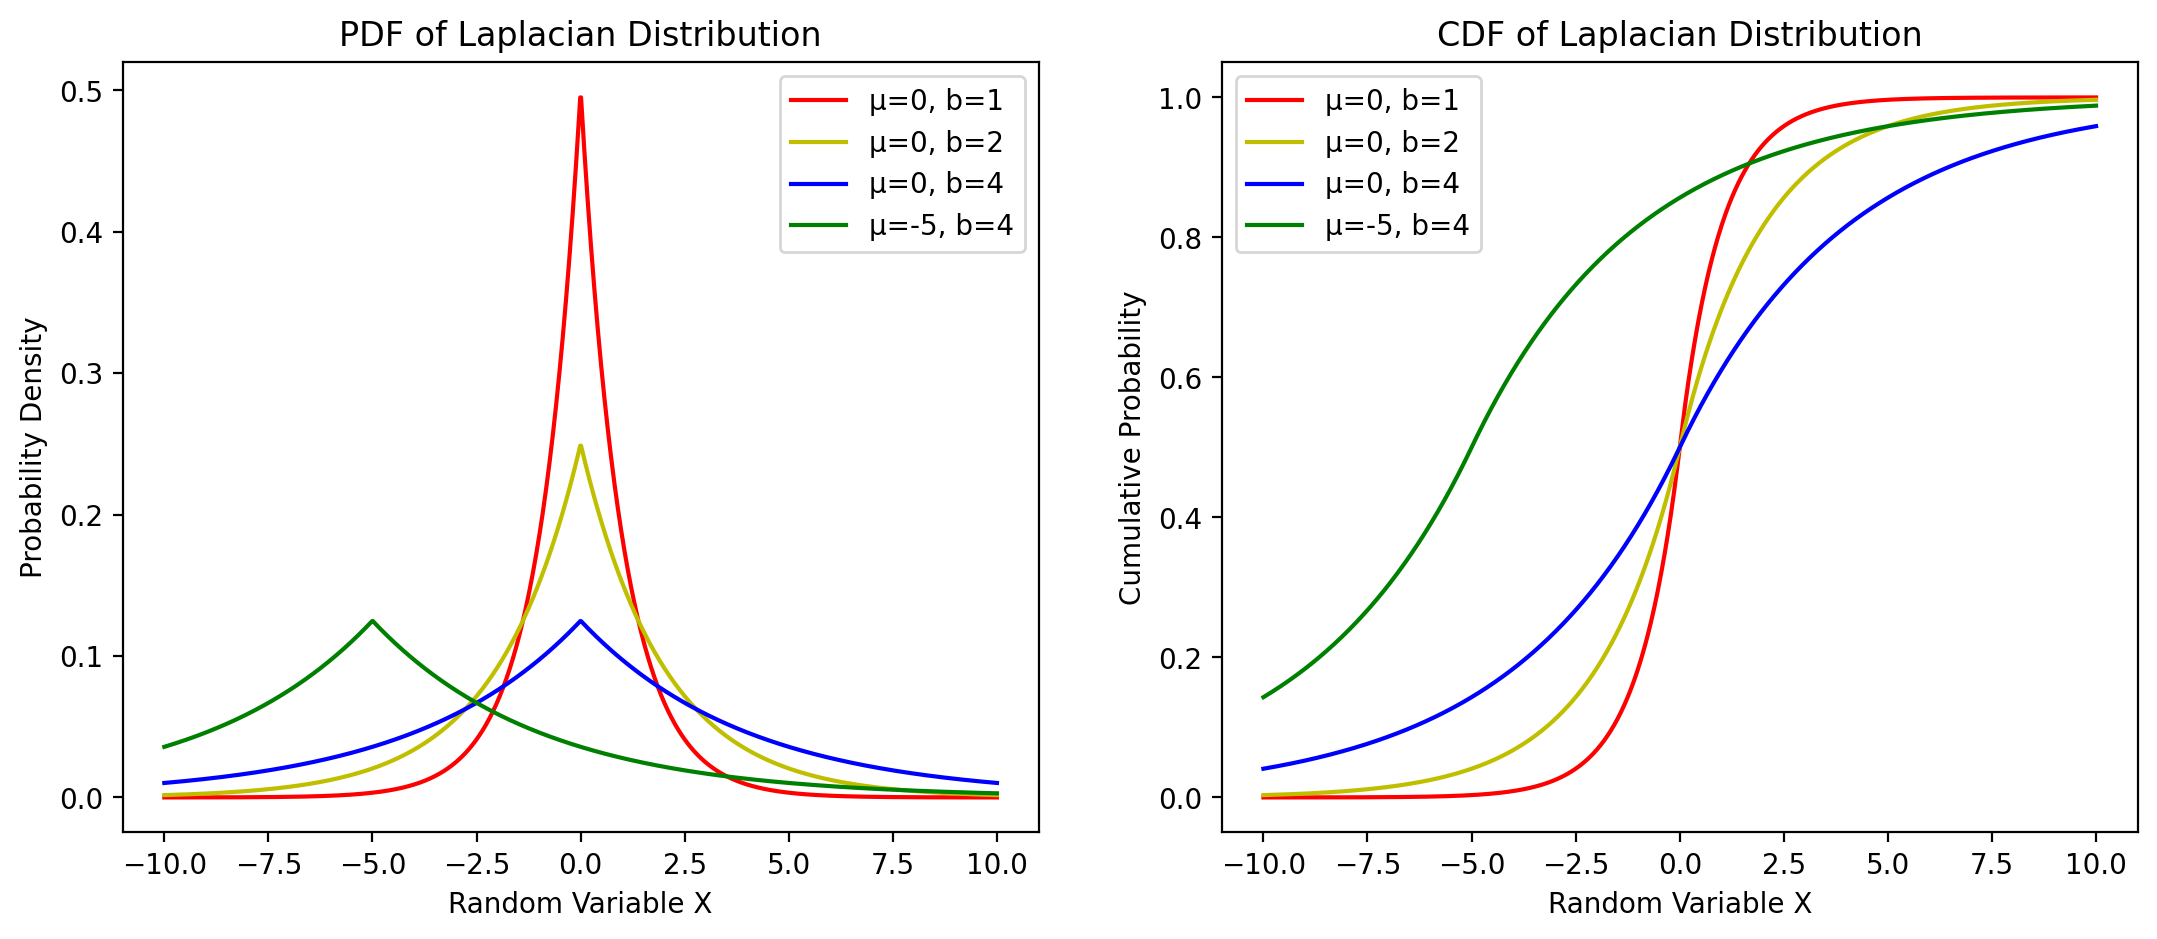

In [10]:
def laplacian_prob(x, μ, b):
  return (1 / (2 * b)) * np.exp(-abs(x - μ) / b)

def laplacian_pdf(μ, b, col, ax=None):
  X = np.linspace(-10, 10, 1000)
  pdf = np.array([laplacian_prob(x, μ, b) for x in X])
  if ax is None:
    fig, ax = plt.subplots()
  ax.plot(X, pdf, color=col, label="μ=" + str(μ) + ", b=" + str(b))
  ax.set_title(f"PDF of Laplacian Distribution")
  ax.set_xlabel("Random Variable X")
  ax.set_ylabel("Probability Density")
  ax.legend()
  return X, pdf

def laplacian_cdf_val(x, μ, b):
  if x < μ:
    return np.exp((x - μ) / b) / 2
  else:
    return 1 - np.exp(-(x - μ) / b) / 2

def laplacian_cdf(μ, b, col, ax=None):
  X = np.linspace(-10, 10, 1000)
  cdf = np.array([laplacian_cdf_val(x, μ, b) for x in X])
  if ax is None:
    fig, ax = plt.subplots()
  ax.plot(X, cdf, color=col, label="μ=" + str(μ) + ", b=" + str(b))
  ax.set_title(f"CDF of Laplacian Distribution")
  ax.set_xlabel("Random Variable X")
  ax.set_ylabel("Cumulative Probability")
  ax.legend()
  return X, cdf


fig, ax = plt.subplots(1, 2, figsize=(13, 5))

x1, pdf1 = laplacian_pdf(0, 1, 'r', ax[0])
x2, pdf2 = laplacian_pdf(0, 2, 'y', ax[0])
x3, pdf3 = laplacian_pdf(0, 4, 'b', ax[0])
x4, pdf4 = laplacian_pdf(-5, 4, 'g', ax[0])

x1, cdf1 = laplacian_cdf(0, 1, 'r', ax[1])
x2, cdf2 = laplacian_cdf(0, 2, 'y', ax[1])
x3, cdf3 = laplacian_cdf(0, 4, 'b', ax[1])
x4, cdf4 = laplacian_cdf(-5, 4, 'g', ax[1])
plt.show()

In [11]:
# # using cummulative sum method for verifying and validating

# def laplacian_cdf_val2(x,μ,b):
#   return (1/(2*b))*np.exp(-abs(x-μ)/b)

# def laplacian_cdf2(μ,b,col):
#   X=np.linspace(-10,10,1000)
#   Y=np.array([laplacian_cdf_val2(x,μ,b) for x in X])
#   cdf=np.cumsum(Y)/np.sum(Y)
#   plt.plot(X,cdf, color=col, label="μ="+str(μ)+", b="+str(b))
#   plt.title(f"Laplacian Continuous Distribution Function")
#   plt.xlabel("Random Variable X")
#   plt.ylabel("CDF")
#   plt.legend()

### Rayleigh Distribution

The **Rayleigh Distribution** is a continuous probability distribution commonly used in modeling phenomena such as wind speeds, signal strength, and noise in communication systems. It is characterized by a scale parameter $\sigma > 0$, which determines the spread of the distribution.

The probability density function (PDF) of the Rayleigh distribution is given by:

$$
p_X(x) = 
\begin{cases} 
0 & \text{if } x < 0 \\ 
\frac{x}{\sigma^2} e^{-\frac{x^2}{2\sigma^2}} & \text{if } x \ge 0
\end{cases}
$$

Here:
- $x \geq 0$ represents the domain of the distribution,
- $\sigma$ is the scale parameter.

The **Cumulative Distribution Function (CDF)**, $F_X(x)$, gives the probability that the random variable $X$ is less than or equal to $x$. It is calculated by integrating the PDF from $-\infty$ to $x$:

$$
F_X(x) = \int_{-\infty}^x p_X(x) \, dx
$$

For the Rayleigh distribution, this simplifies to:

$$
F_X(x) = 
\begin{cases} 
0 & \text{if } x < 0 \\ 
1 - e^{-\frac{x^2}{2\sigma^2}} & \text{if } x \ge 0
\end{cases}
$$

In simple terms:
- For $x < 0$, the CDF is 0 since the Rayleigh distribution is defined only for non-negative values.
- For $x \ge 0$, the CDF increases from 0 to 1 as $x$ grows, with the growth rate determined by $\sigma$.

Key properties of the Rayleigh distribution include:
1. **Applications**: Used in radar, wireless communications, and modeling random vector magnitudes.
2. **Mean and Variance**: The mean is $\sigma \sqrt{\pi/2}$, and the variance is $(2 - \pi/2)\sigma^2$.
3. **Mode**: The mode of the distribution occurs at $x = \sigma$, representing the most probable value.


**PDF and CDF for Rayleigh Distribution**

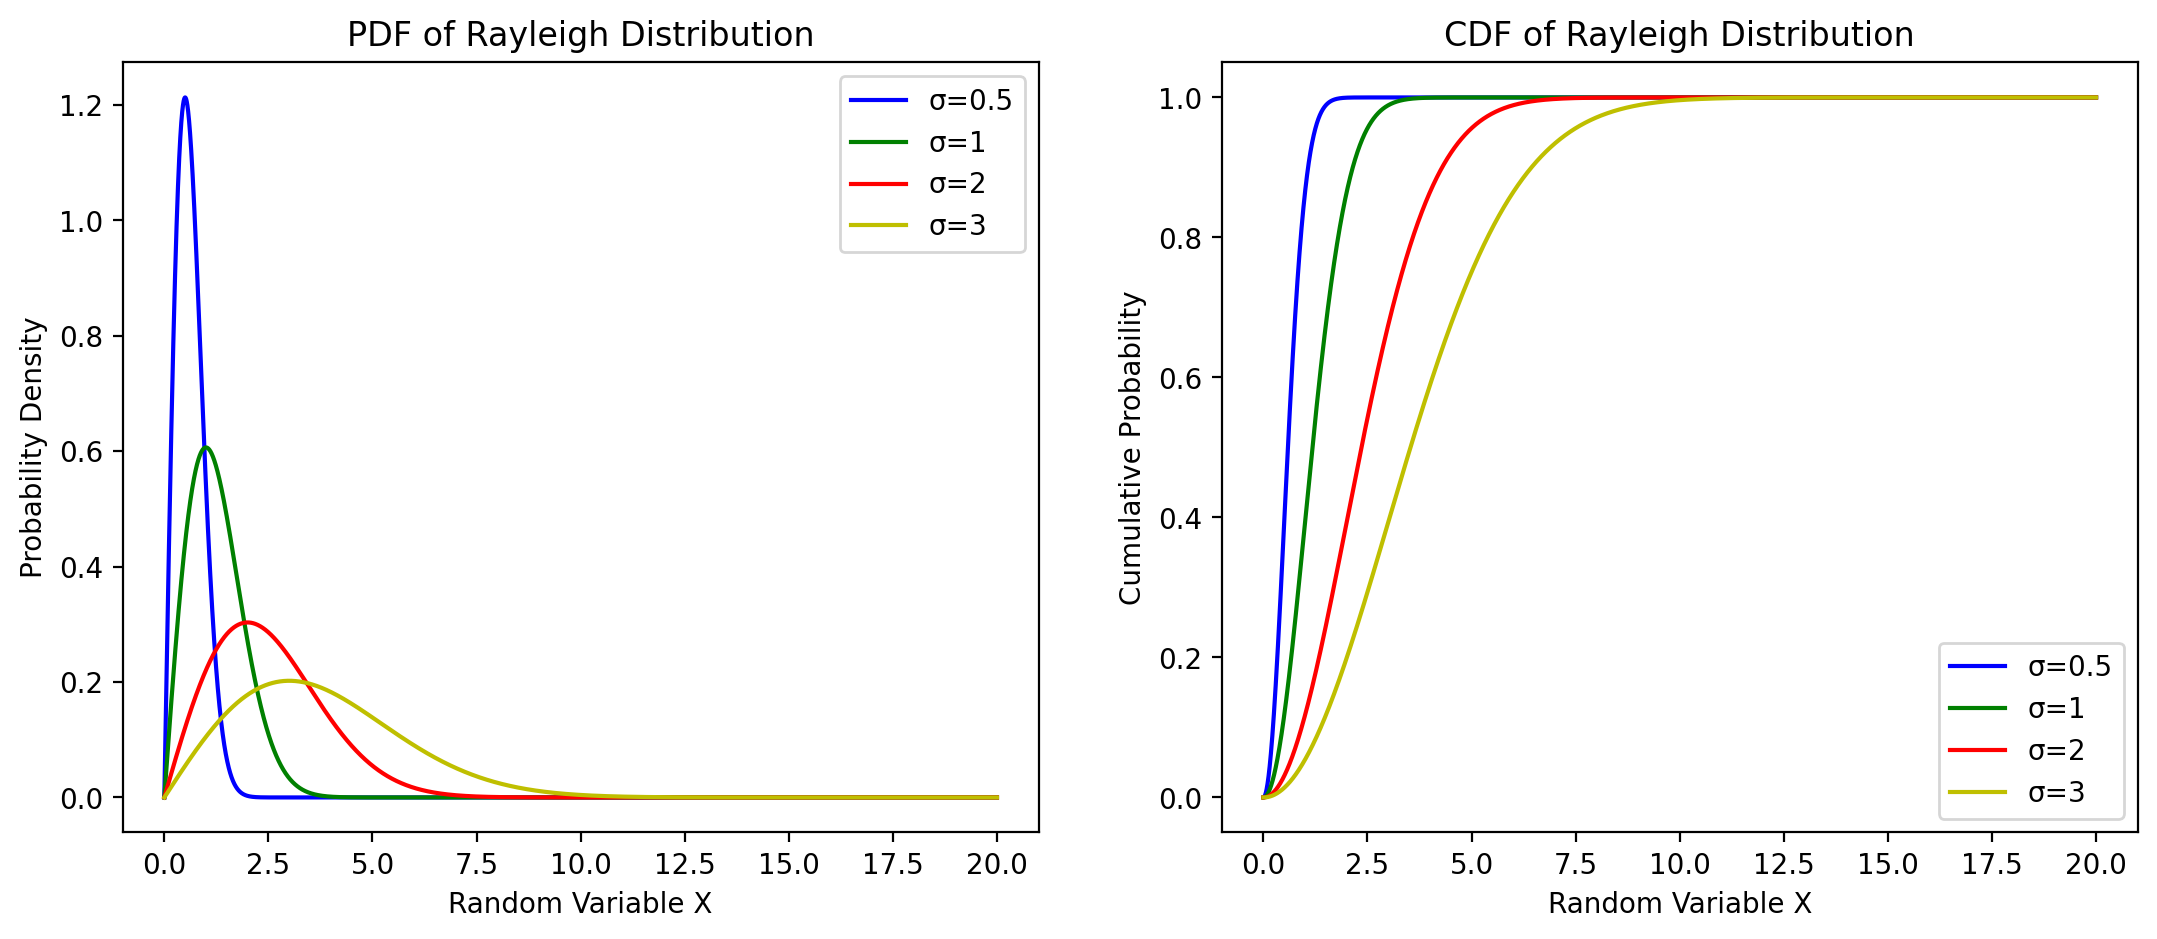

In [12]:
def rayleigh_prob(x, sigma):
  return (x / (sigma ** 2)) * np.exp(-0.5 * (x / sigma) ** 2)

def rayleigh_pdf(sigma, col, ax=None):
  X = np.linspace(0, 20, 10000)
  pdf = np.array([rayleigh_prob(x, sigma) for x in X])
  if ax is None:
    fig, ax = plt.subplots()
  ax.plot(X, pdf, color=col, label="σ=" + str(sigma))
  ax.set_title(f"PDF of Rayleigh Distribution")
  ax.set_xlabel("Random Variable X")
  ax.set_ylabel("Probability Density")
  ax.legend()
  return X, pdf

def rayleigh_cdf_val(x, sigma):
  return 1 - np.exp(-(x ** 2) / (2 * sigma ** 2))

def rayleigh_cdf(sigma, col, ax=None):
  X = np.linspace(0, 20, 10000)
  cdf = np.array([rayleigh_cdf_val(x, sigma) for x in X])
  if ax is None:
    fig, ax = plt.subplots()
  ax.plot(X, cdf, color=col, label="σ=" + str(sigma))
  ax.set_title(f"CDF of Rayleigh Distribution")
  ax.set_xlabel("Random Variable X")
  ax.set_ylabel("Cumulative Probability")
  ax.legend()
  return X, cdf



fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# Plot PDF
x1, pdf1 = rayleigh_pdf(0.5, 'b', ax[0])
x2, pdf2 = rayleigh_pdf(1, 'g', ax[0])
x3, pdf3 = rayleigh_pdf(2, 'r', ax[0])
x4, pdf4 = rayleigh_pdf(3, 'y', ax[0])

# Plot CDF
x1, cdf1 = rayleigh_cdf(0.5, 'b', ax[1])
x2, cdf2 = rayleigh_cdf(1, 'g', ax[1])
x3, cdf3 = rayleigh_cdf(2, 'r', ax[1])
x4, cdf4 = rayleigh_cdf(3, 'y', ax[1])

plt.show()

In [13]:
# # using cummulative sum method for verifying and validating

# def rayleigh_prob(x,sigma):
#   return (x/(sigma**2))*np.exp(-0.5*(x/sigma)**2)

# def rayleigh_cdf(sigma,col):
#   X=np.linspace(0,20,10000)
#   Y=np.array([rayleigh_prob(x,sigma) for x in X])
#   cdf=np.cumsum(Y)/np.sum(Y)
#   plt.plot(X,cdf, color=col, label="σ="+str(sigma))
#   plt.title(f"Rayleigh Continuous Density Function")
#   plt.xlabel("Random Variable X")
#   plt.ylabel("CDF")
#   plt.legend()

## CDFs of Discrete Random Variables

(The PMFs of discrete random variables were plotted in assignment-3.)

### Discrete Uniform Distribution

The **Discrete Uniform Distribution** is a discrete probability distribution where each of the $n$ outcomes is equally likely. The probability mass function (PMF) for a discrete uniform random variable $X$, taking values from $a$ to $b$ (inclusive), is given by:

$$
p_X(x) = \frac{1}{b - a + 1} \quad \text{for } x = a, a+1, \dots, b
$$

The **Cumulative Distribution Function (CDF)**, $F_X(x)$, is the probability that the random variable $X$ takes a value less than or equal to $x$. It is given by:

$$
F_X(x) = \frac{x - a + 1}{b - a + 1} \quad \text{for } a \le x \le b
$$


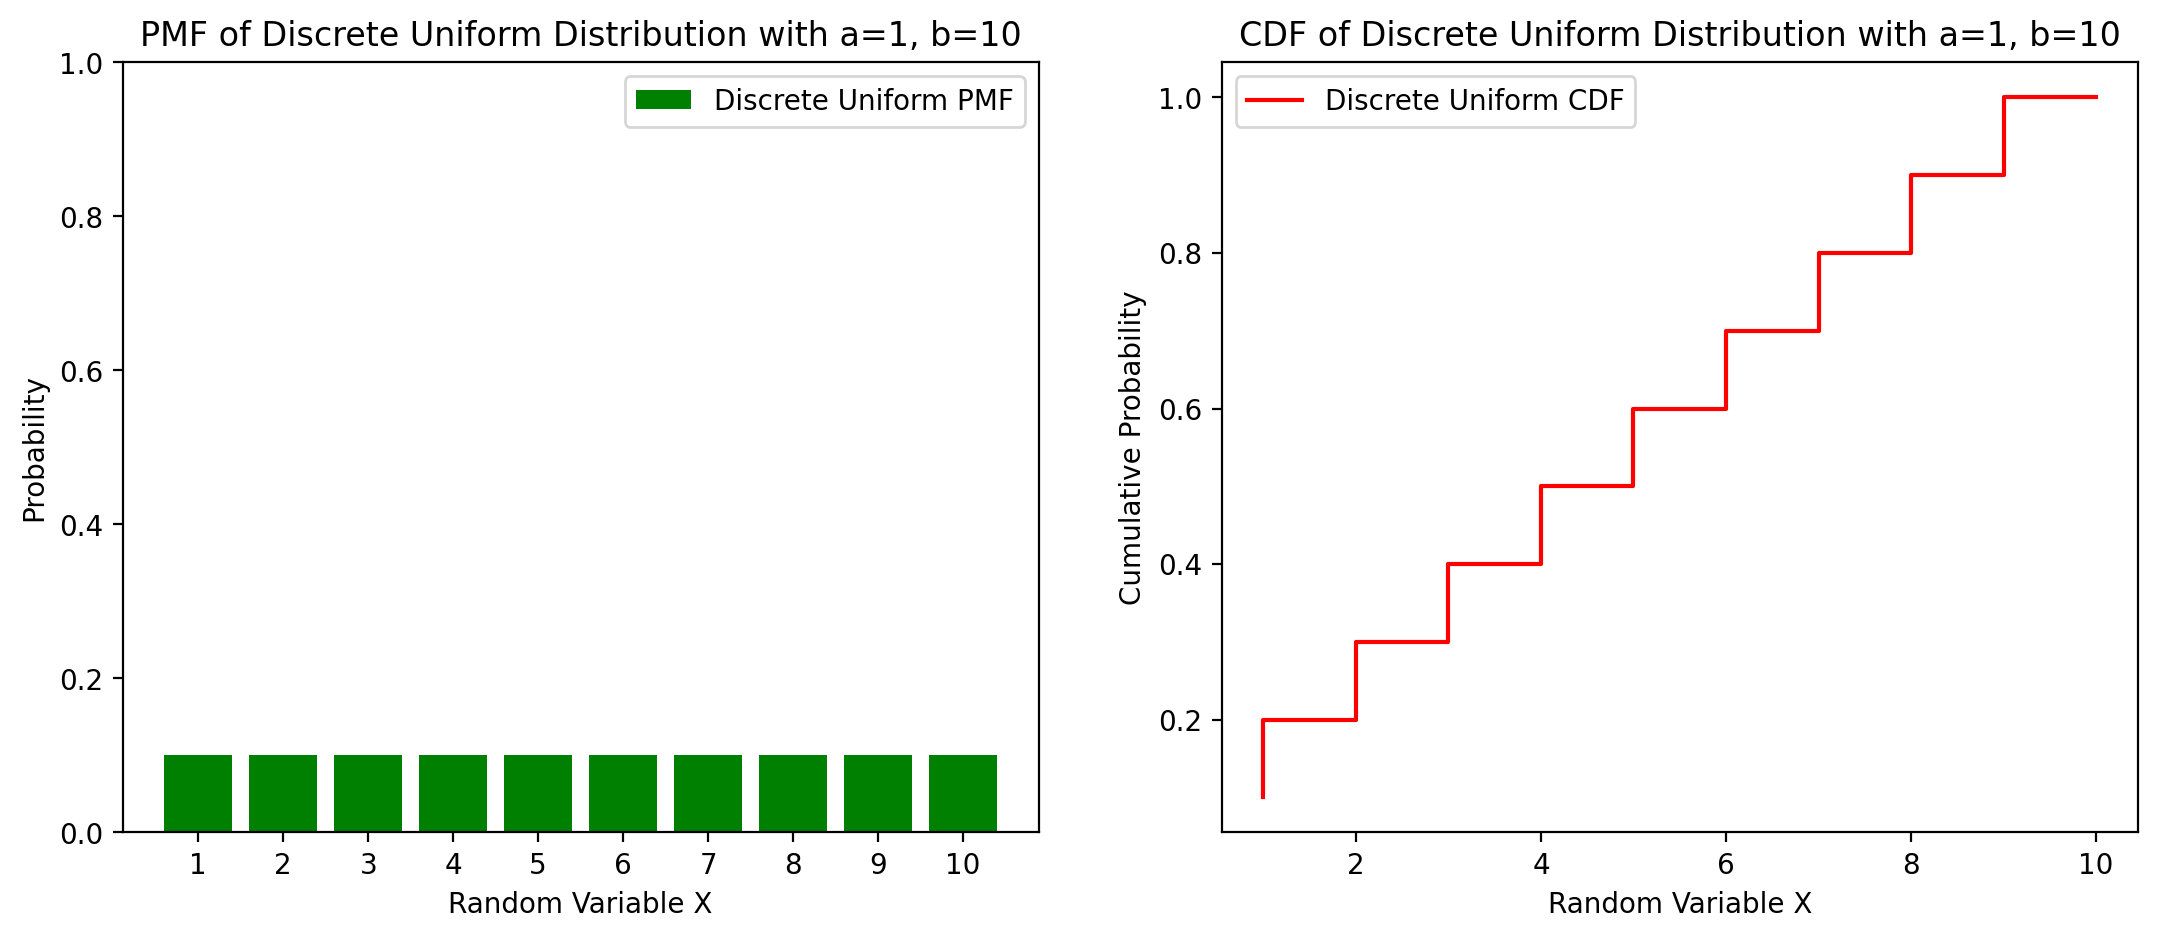

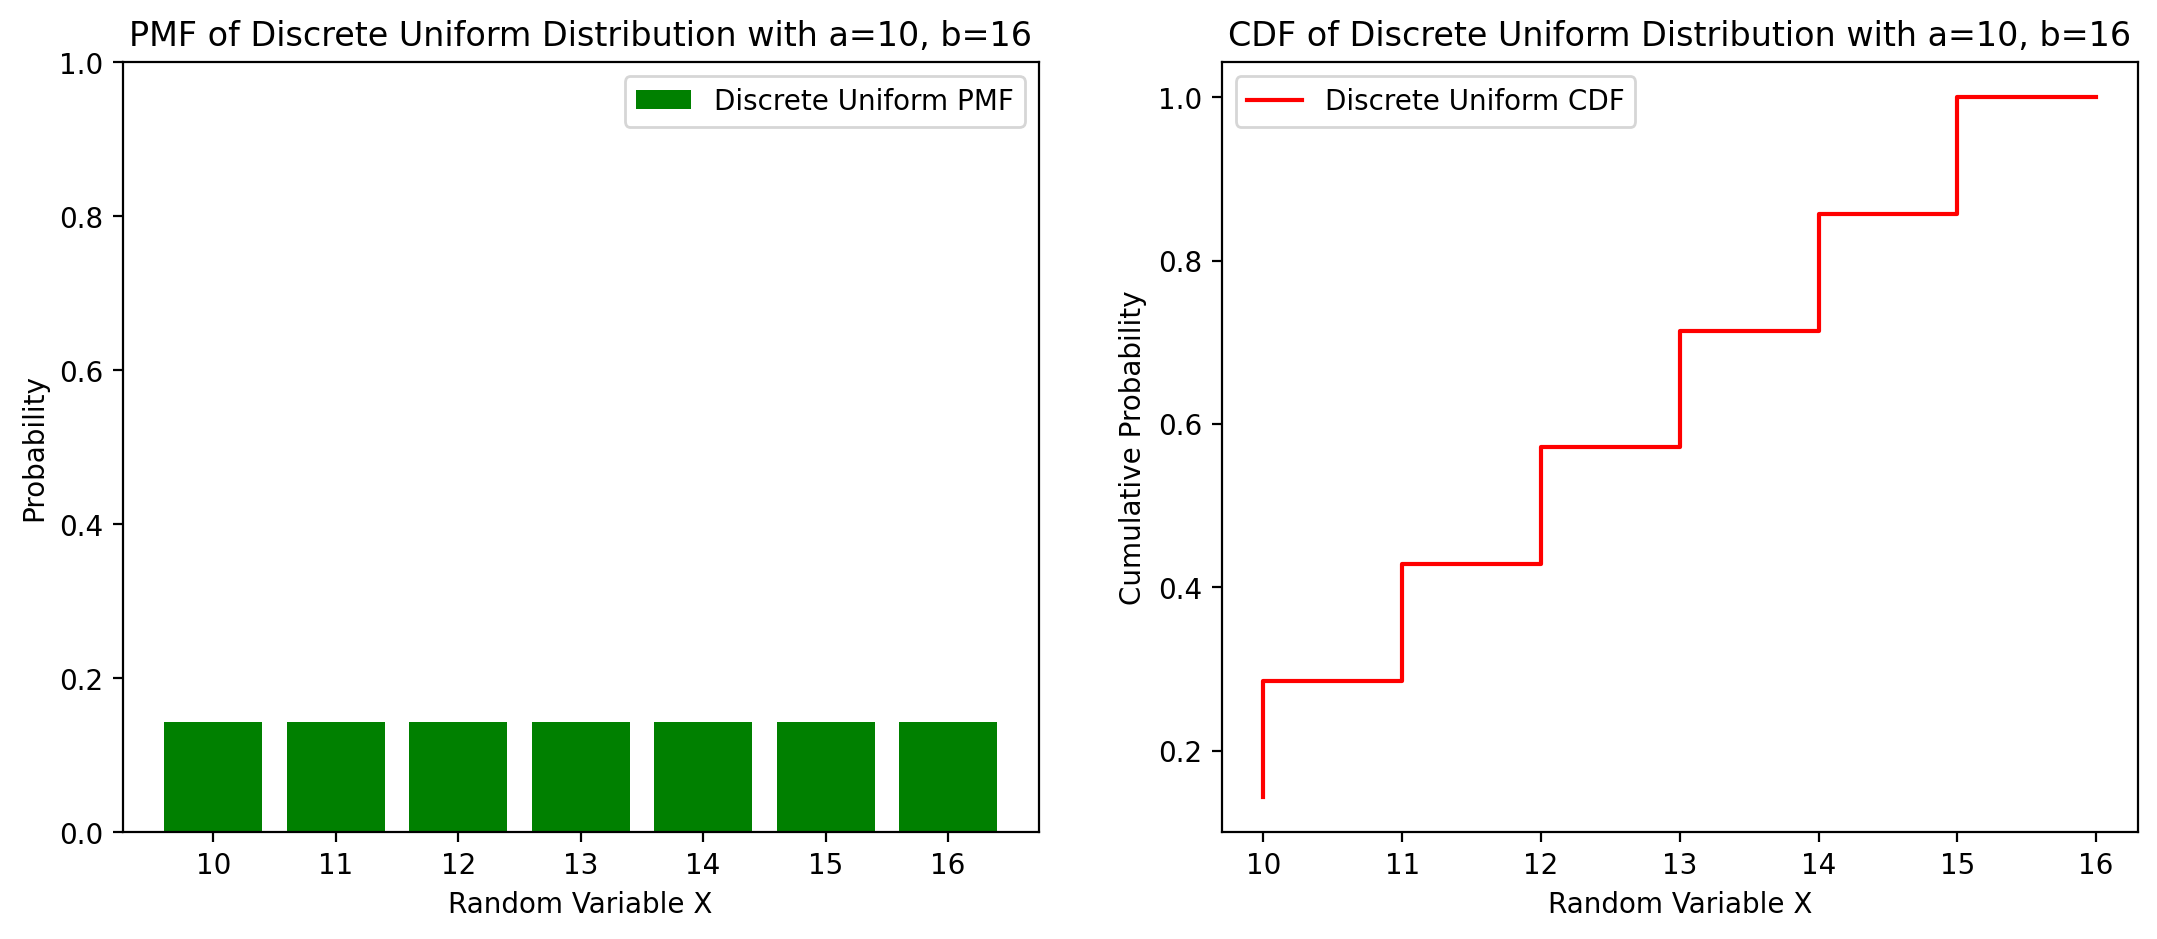

In [14]:
#Q1 a) Discrete Uniform Probability Distribution
def discrete_prob(num):
  return 1/(num)

def discrete_pmf(a, b):
  x=np.arange(a,b+1)
  num=b+1-a
  pmf=[discrete_prob(num) for i in x]
  return pmf

def discrete_cdf_val(x,a,b):
  if x>=a and x<=b:
    return (x-a+1)/(b-a+1)
  elif x>b:
    return 1
  else:
    return 0
  
def discrete_cdf(a, b):
  x=np.arange(a,b+1)
  num=b+1-a
  cdf=[discrete_cdf_val(i,a,b) for i in x]
  return cdf


def plot_discrete_pmf_cdf(a, b):
  fig, ax = plt.subplots(1, 2, figsize=(13, 5))
  x=np.arange(a,b+1)
  num=b+1-a
  pmf=[discrete_prob(num) for i in x]
  ax[0].bar(x, pmf, color="g", label="Discrete Uniform PMF")
  ax[0].set_title(f'PMF of Discrete Uniform Distribution with a={a}, b={b}')
  ax[0].set_xlabel('Random Variable X')
  ax[0].set_xticks(x)
  ax[0].set_ylabel('Probability')
  ax[0].set_ylim(0,1)
  ax[0].legend()
  cdf=[discrete_cdf_val(i,a,b) for i in x]
  ax[1].step(x,cdf, color="r", label="Discrete Uniform CDF")
  ax[1].set_title(f'CDF of Discrete Uniform Distribution with a={a}, b={b}')
  ax[1].set_xlabel('Random Variable X')
  ax[1].set_ylabel('Cumulative Probability')
  ax[1].legend()
  plt.show()
  

plot_discrete_pmf_cdf(1,10)
plot_discrete_pmf_cdf(10, 16)

In [15]:
# # using cummulative sum method for verifying and validating

# def discrete_cdf2(a, b):
#   x=np.arange(a, b+1)
#   num=b+1-a
#   y=np.linspace(a,b,1000)
#   pmf=[discrete_prob(num) for i in x]
#   cdf=np.cumsum(pmf)
#   plt.step(x,cdf, color="g", label="Discrete Uniform")
#   plt.title(f"Discrete Uniform Continuous Distribution Function")
#   plt.xlabel("Random Variable X")
#   plt.ylabel("CDF")
#   plt.legend()
#   plt.show()

### Bernoulli Distribution

The **Bernoulli Distribution** is a discrete probability distribution of a random variable that takes the value 1 with probability $p$ and the value 0 with probability $1 - p$, where $0 \leq p \leq 1$.

The probability mass function (PMF) for a Bernoulli random variable $X$ is given by:

$$
p_X(x) = 
\begin{cases} 
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0
\end{cases}
$$

The **Cumulative Distribution Function (CDF)**, $F_X(x)$, is the probability that the random variable $X$ takes a value less than or equal to $x$. It is given by:

$$
F_X(x) = 
\begin{cases} 
0 & \text{if } x < 0 \\
1 - p & \text{if } 0 \leq x < 1 \\
1 & \text{if } x \ge 1
\end{cases}
$$


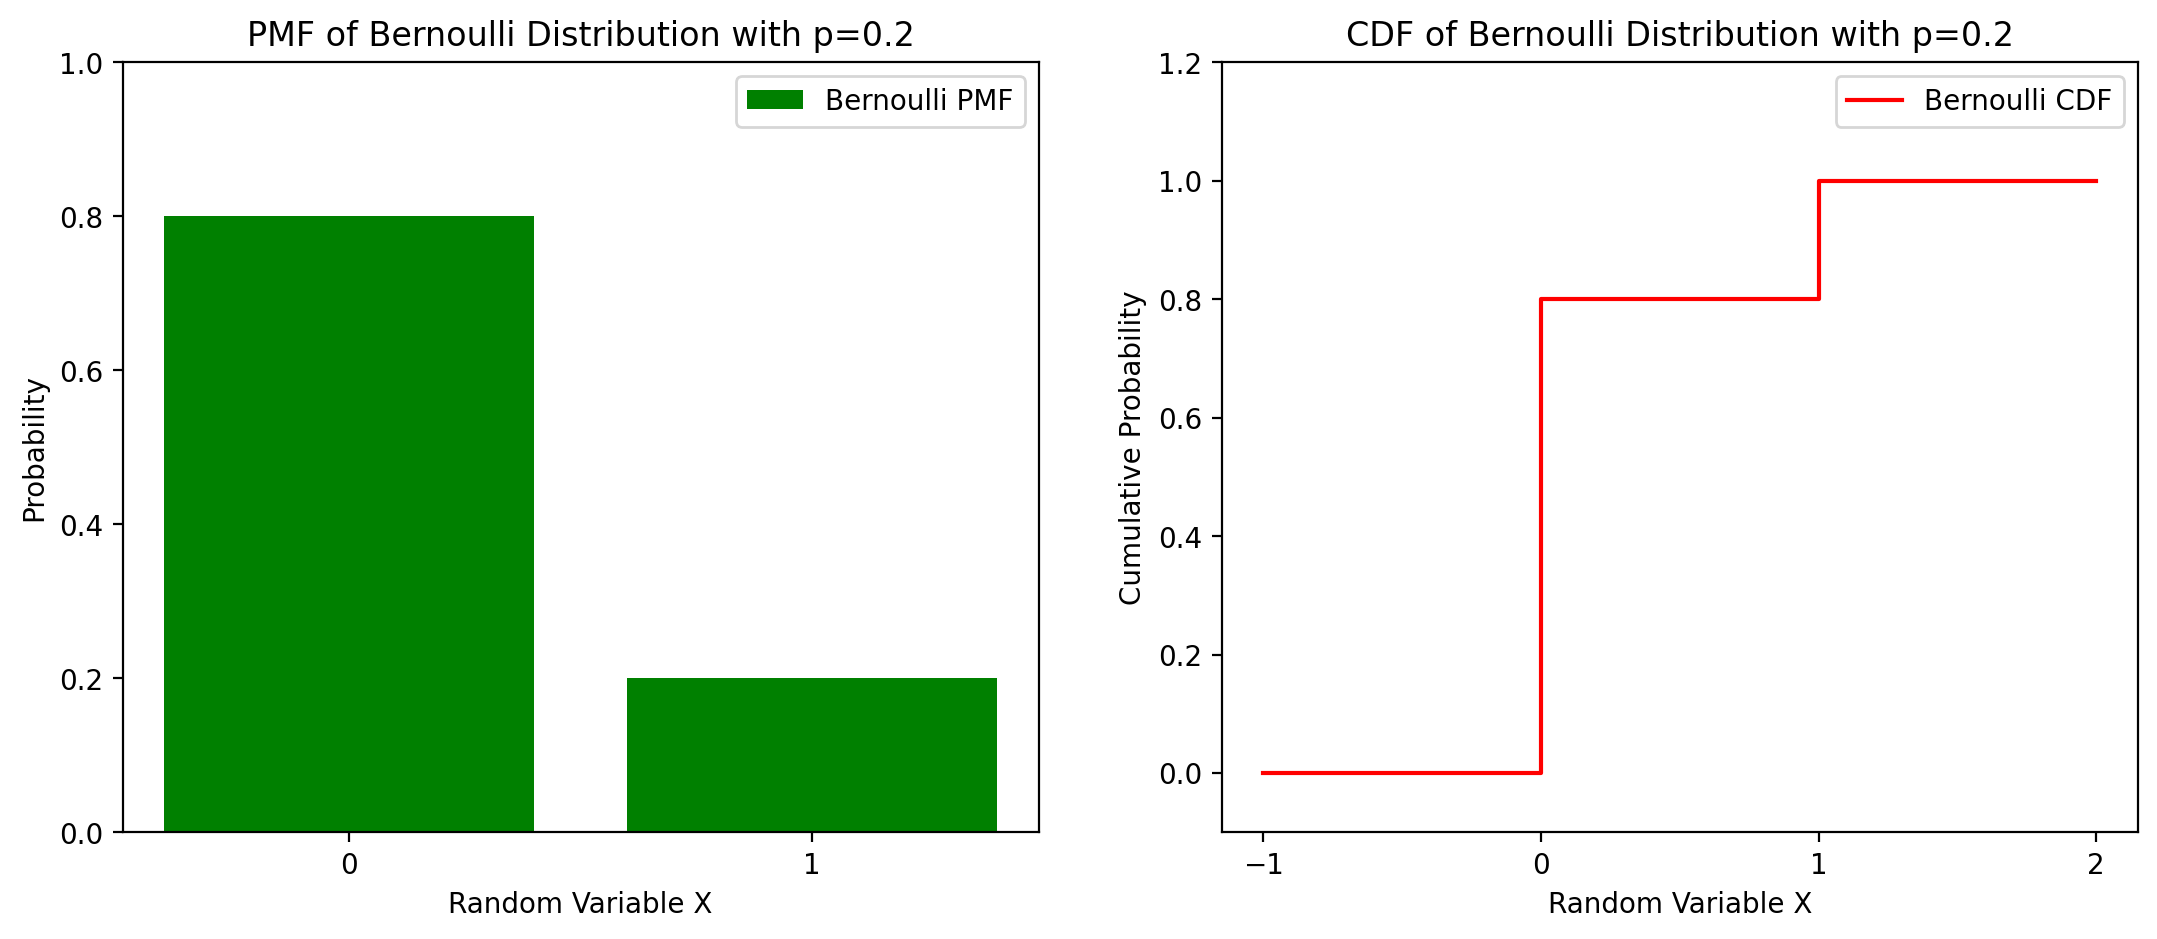

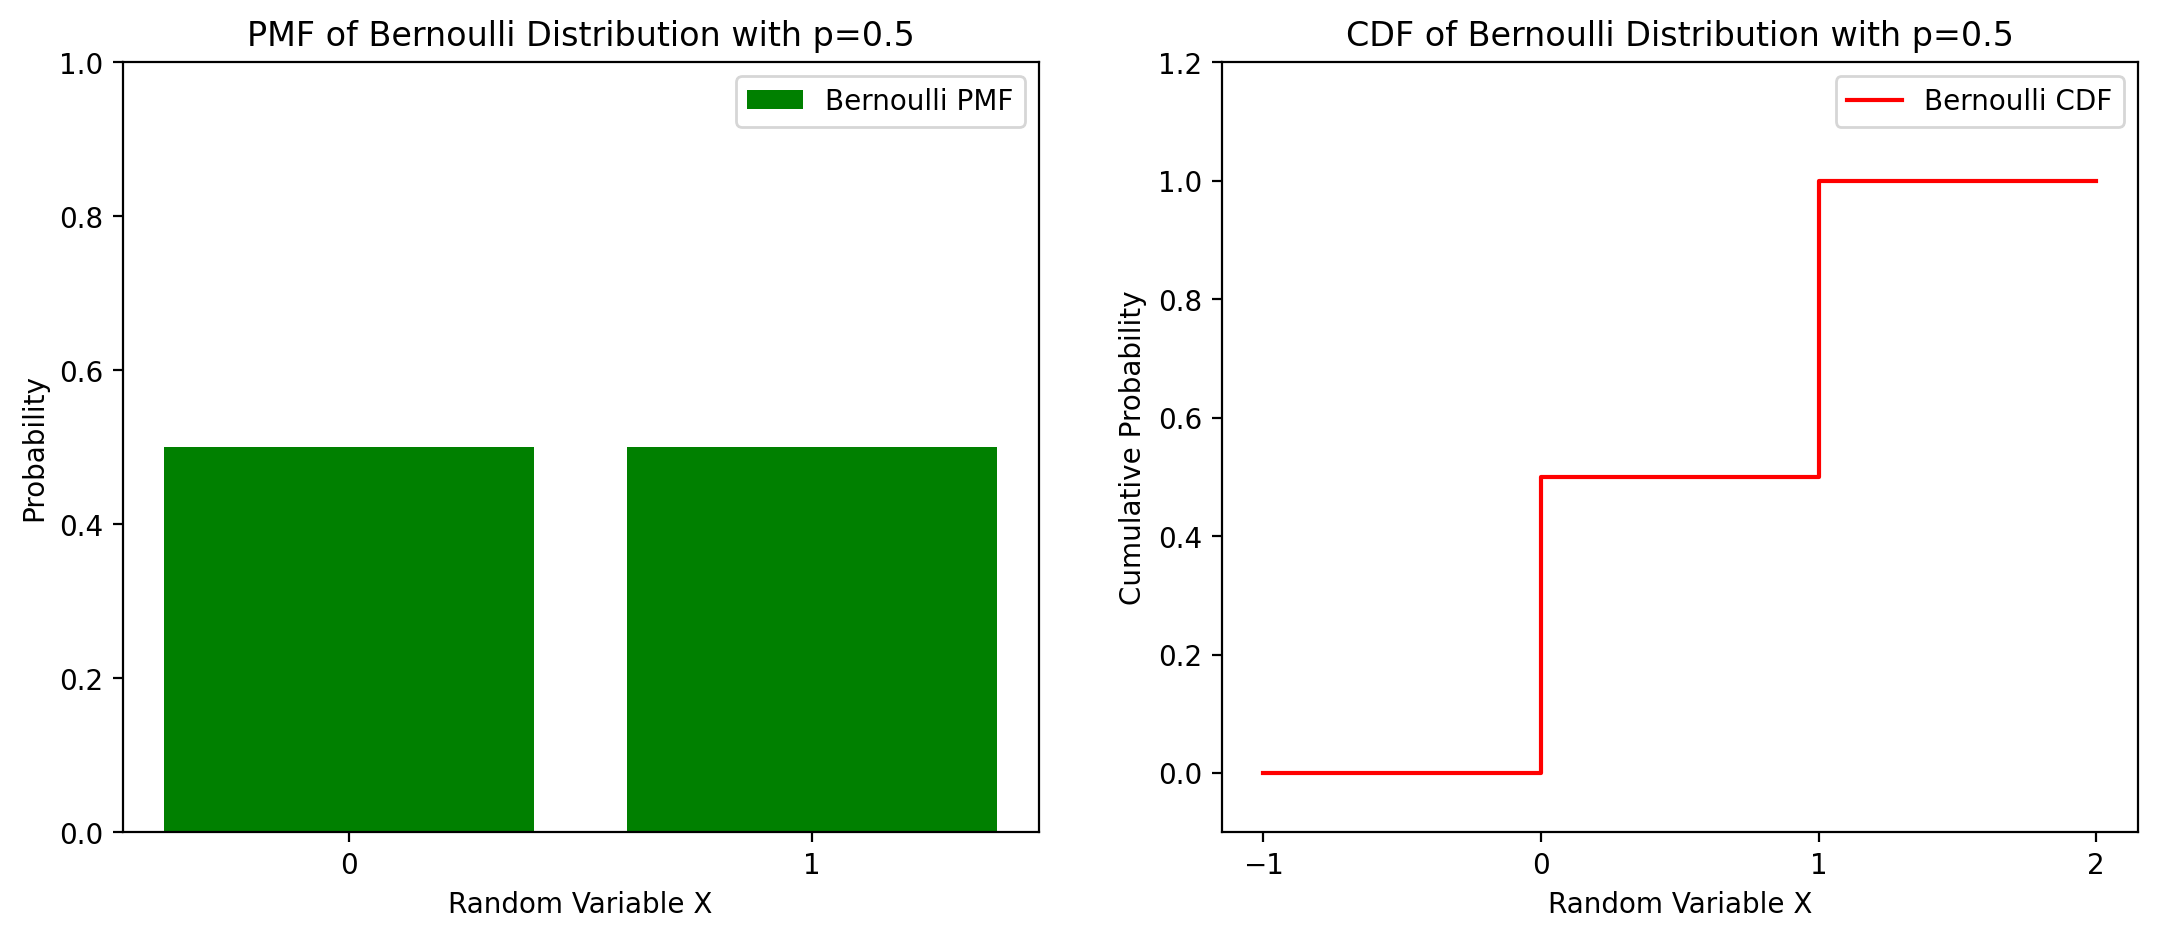

In [16]:
def bernoulli_prob(x, p):
  if x == 0:
    return 1 - p
  elif x == 1:
    return p
  else:
    return 0

def bernoulli_pmf(p):
  x = [0, 1]
  pmf = [bernoulli_prob(i, p) for i in x]
  return pmf

def bernoulli_cdf_val(x, p):
  if x < 0:
    return 0
  elif x == 0:
    return 1 - p
  else:  # x == 1
    return 1

def bernoulli_cdf(p):
  x = [0, 1]
  cdf = [bernoulli_cdf_val(i, p) for i in x]
  return cdf

def plot_bernoulli_pmf_cdf(p):
  fig, ax = plt.subplots(1, 2, figsize=(13, 5))

  # PMF Plot
  x = [0, 1]
  pmf = [bernoulli_prob(i, p) for i in x]
  ax[0].bar(x, pmf, color="g", label="Bernoulli PMF")
  ax[0].set_title(f'PMF of Bernoulli Distribution with p={p}')
  ax[0].set_xlabel('Random Variable X')
  ax[0].set_xticks(x)
  ax[0].set_ylabel('Probability')
  ax[0].set_ylim(0, 1)
  ax[0].legend()

  # CDF Plot
  x_cdf = [-1, 0, 1, 2]
  cdf = [bernoulli_cdf_val(i, p) for i in x_cdf]
  ax[1].step(x_cdf, cdf, color="r", label="Bernoulli CDF", where="post")
  ax[1].set_title(f'CDF of Bernoulli Distribution with p={p}')
  ax[1].set_xlabel('Random Variable X')
  ax[1].set_xticks(x_cdf)
  ax[1].set_ylim(-0.1, 1.2)
  ax[1].set_ylabel('Cumulative Probability')
  ax[1].legend()

  plt.show()

plot_bernoulli_pmf_cdf(0.2)
plot_bernoulli_pmf_cdf(0.5)


In [17]:
# # using cummulative sum method for verifying and validating
# def bernoulli_cdf2(p):
#   x=[0,1]
#   pmf=[bernoulli_prob(i,p) for i in x]
#   cdf=np.cumsum(pmf)
#   plt.bar(x, cdf, width=0.5, color="black", alpha=0.6, label="Bernoulli")
#   plt.title(f"Bernoulli CDF")
#   plt.xlabel("Random Variable X")
#   plt.xticks(x)
#   plt.ylabel("CDF")
#   plt.legend()
#   plt.show()

# # Plot 1
# bernoulli_cdf2(0.2)

# # Plot 2
# bernoulli_cdf2(0.6)

### Binomial Distribution

The **Binomial Distribution** is a discrete probability distribution that models the number of successes in a fixed number of independent Bernoulli trials. The probability mass function (PMF) for a binomial random variable $X$, with parameters $M$ (number of trials) and $p$ (probability of success), is given by:

$$
p_X(x) = \binom{M}{x} p^x (1 - p)^{M - x} \quad \text{for } x = 0, 1, 2, \dots, M
$$

where $\binom{M}{x}$ is the binomial coefficient, representing the number of ways to choose $x$ successes from $M$ trials.

The **Cumulative Distribution Function (CDF)**, $F_X(x)$, is the probability that the random variable $X$ takes a value less than or equal to $x$. It is given by:

$$
F_X(x) = \sum_{k = 0}^{\lfloor x \rfloor} \binom{M}{k} p^k (1 - p)^{M - k}
$$

This CDF does not have a closed-form expression and must typically be computed numerically or using statistical software.


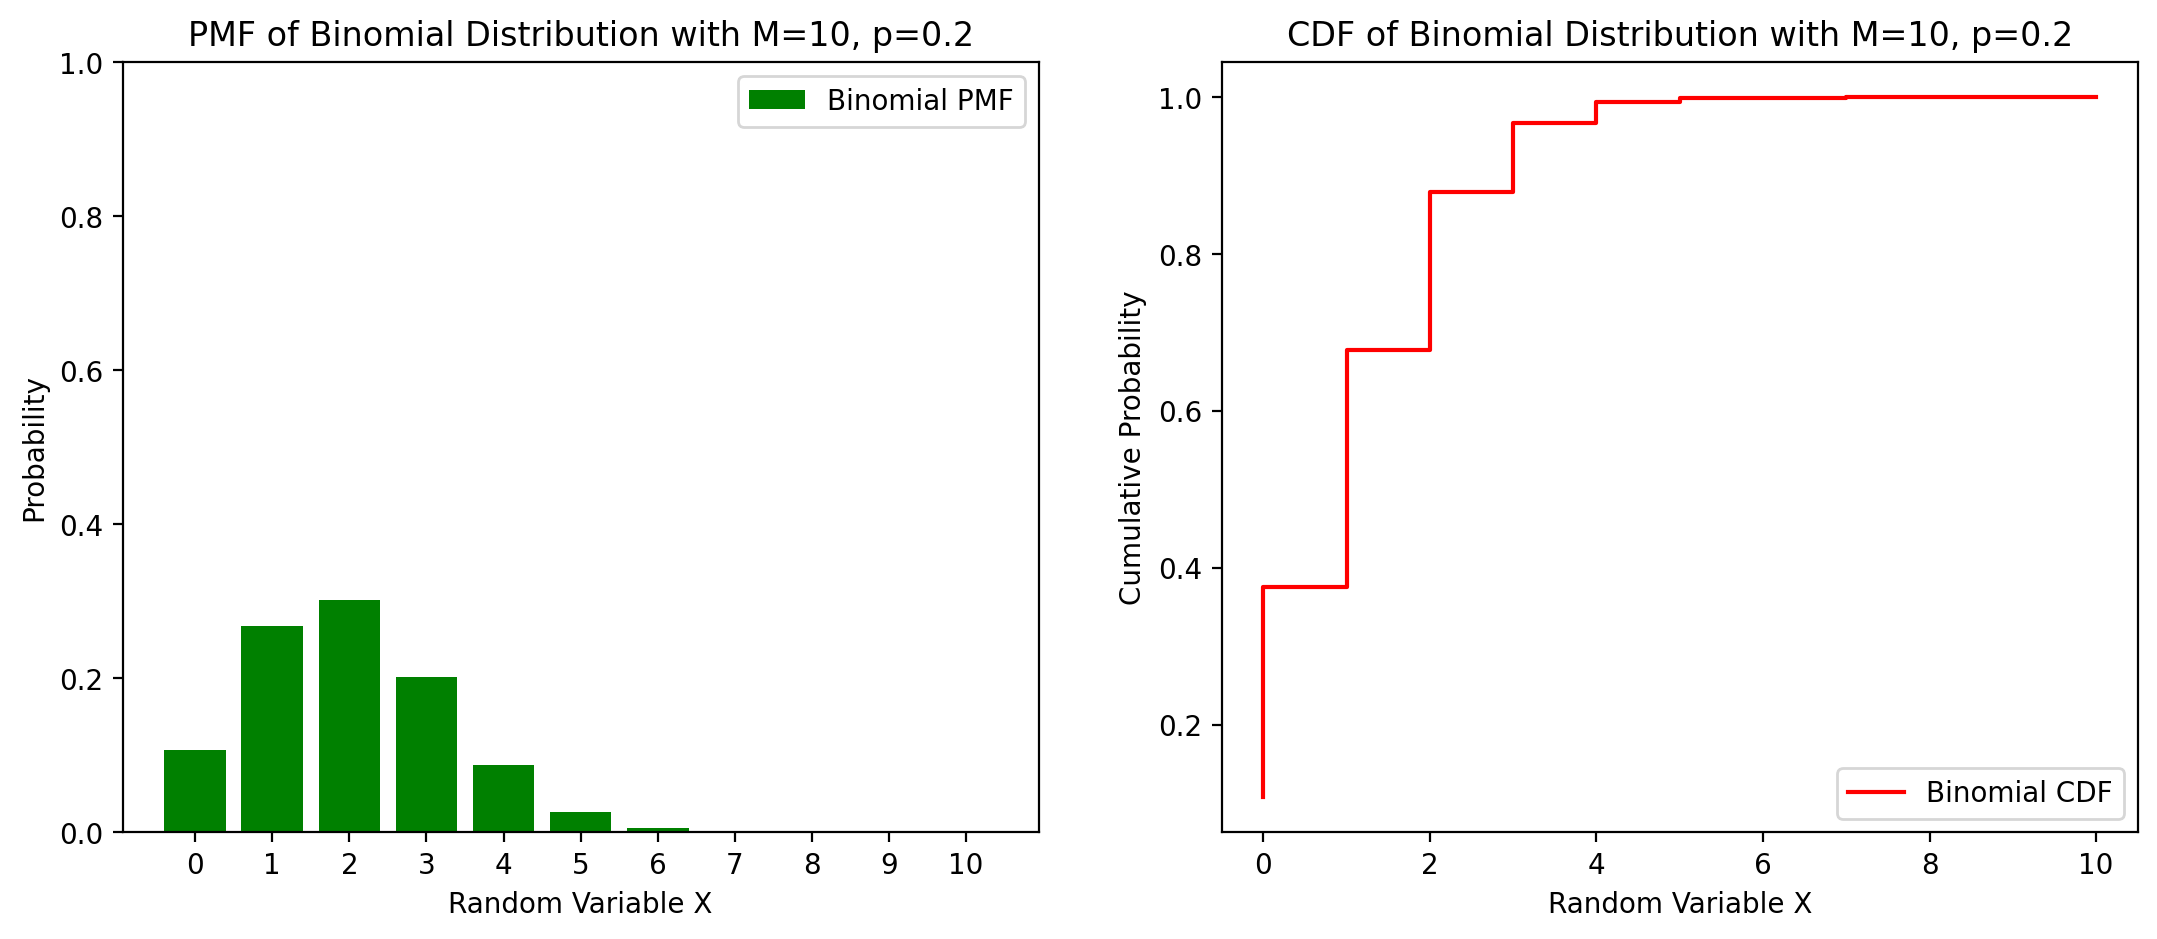

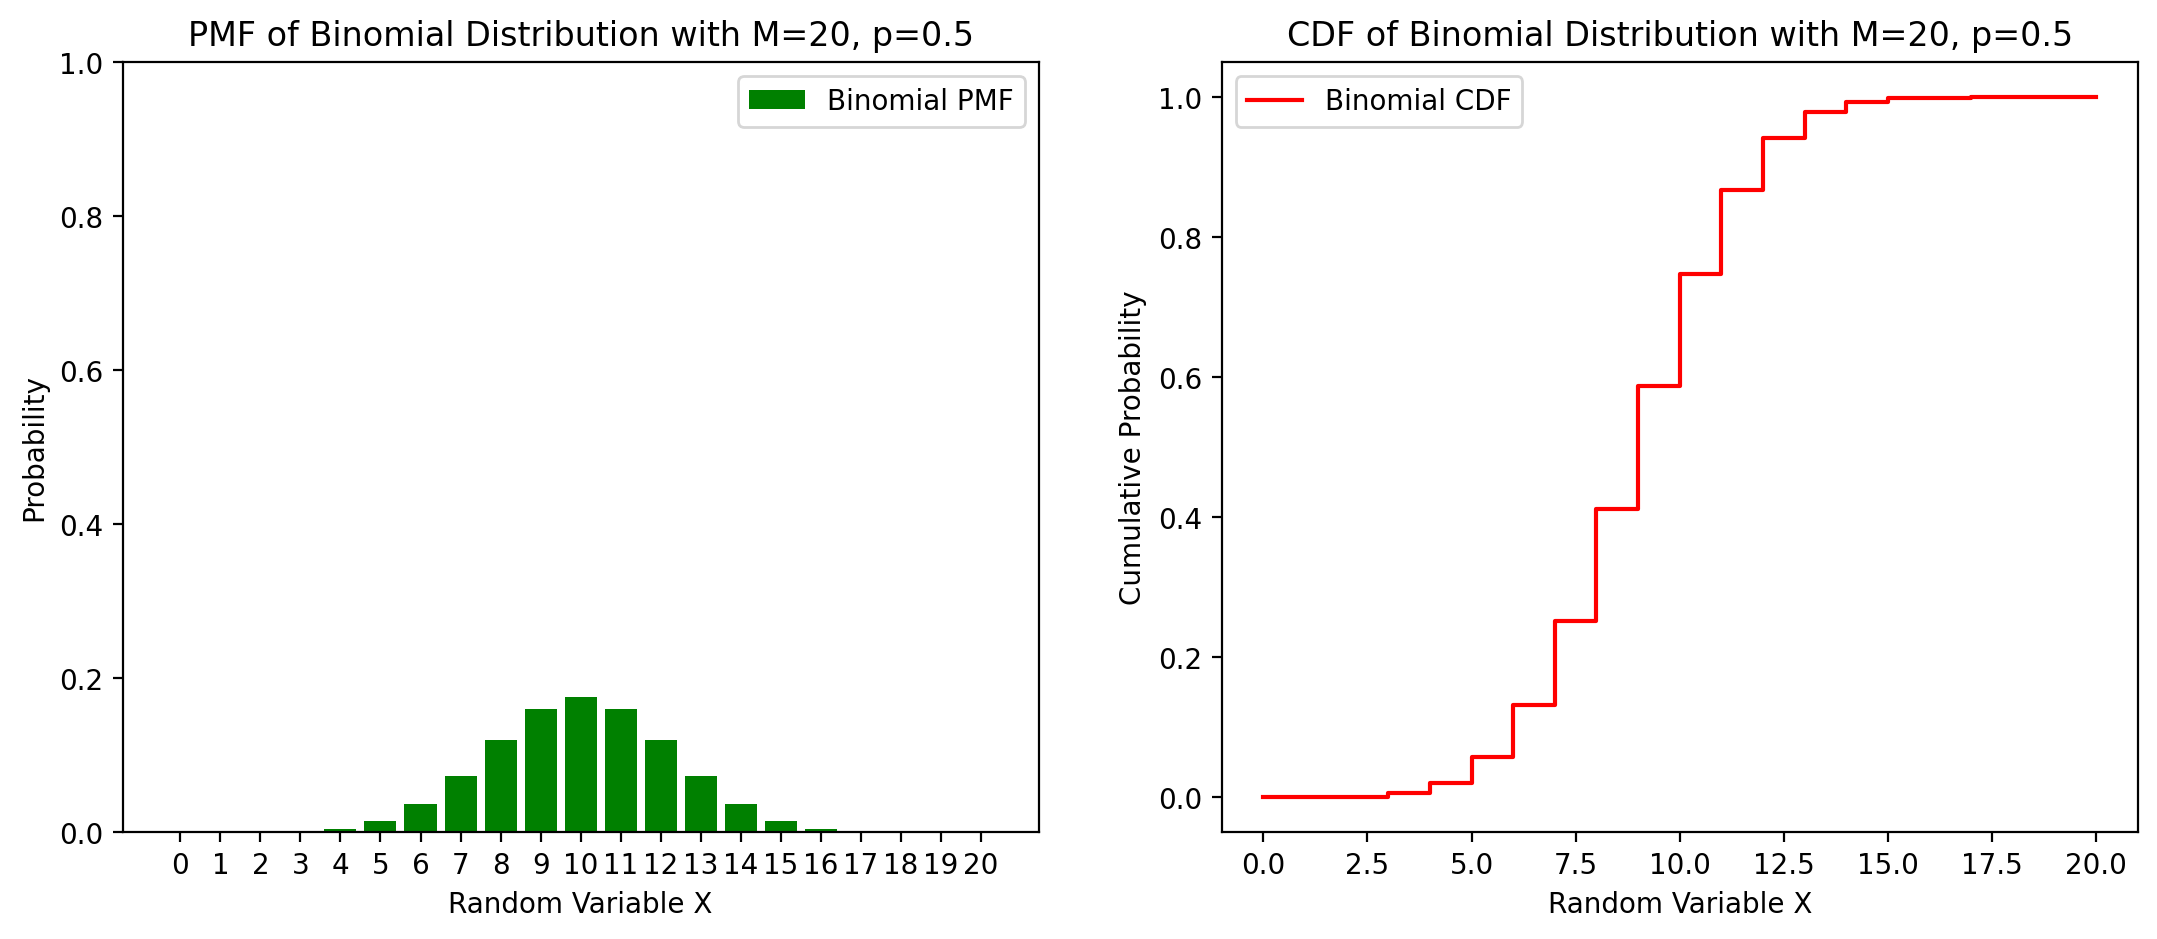

In [18]:
def binomial_prob(k,M,p):
  return combination(M,k)*(p**k)*((1-p)**(M-k))

def binomial_pmf(M,p):
  x=np.arange(M+1)
  pmf=[binomial_prob(i,M,p) for i in x]
  return pmf

def binomial_cdf(M,p):
  x=np.arange(M+1)
  pmf=[binomial_prob(i,M,p) for i in x]
  cdf=np.cumsum(pmf)
  return cdf

def plot_binomial_pmf_cdf(M,p):
  fig, ax = plt.subplots(1, 2, figsize=(13, 5))
  x=np.arange(M+1)
  pmf=[binomial_prob(i,M,p) for i in x]
  ax[0].bar(x, pmf, color="g", label="Binomial PMF")
  ax[0].set_title(f'PMF of Binomial Distribution with M={M}, p={p}')
  ax[0].set_xlabel('Random Variable X')
  ax[0].set_xticks(x)
  ax[0].set_ylabel('Probability')
  ax[0].set_ylim(0,1)
  ax[0].legend()
  cdf=np.cumsum(pmf)
  ax[1].step(x,cdf, color="r", label="Binomial CDF")
  ax[1].set_title(f'CDF of Binomial Distribution with M={M}, p={p}')
  ax[1].set_xlabel('Random Variable X')
  ax[1].set_ylabel('Cumulative Probability')
  ax[1].legend()
  plt.show()
  

plot_binomial_pmf_cdf(10, 0.2)
plot_binomial_pmf_cdf(20, 0.5)

### Poisson Distribution

The **Poisson Distribution** is a discrete probability distribution that models the number of events occurring in a fixed interval of time or space, given a known average rate of occurrence $\lambda$. The probability mass function (PMF) for a Poisson random variable $X$, with parameter $\lambda$, is given by:

$$
p_X(x) = \frac{e^{-\lambda} \lambda^x}{x!} \quad \text{for } x = 0, 1, 2, \dots
$$

where $\lambda > 0$ is the rate parameter, and $x$ represents the number of events.

The **Cumulative Distribution Function (CDF)**, $F_X(x)$, is the probability that the random variable $X$ takes a value less than or equal to $x$. It is given by:

$$
F_X(x) = \sum_{k = 0}^{\lfloor x \rfloor} \frac{e^{-\lambda} \lambda^k}{k!}
$$

This CDF does not have a closed-form expression and must typically be computed numerically or using statistical software.


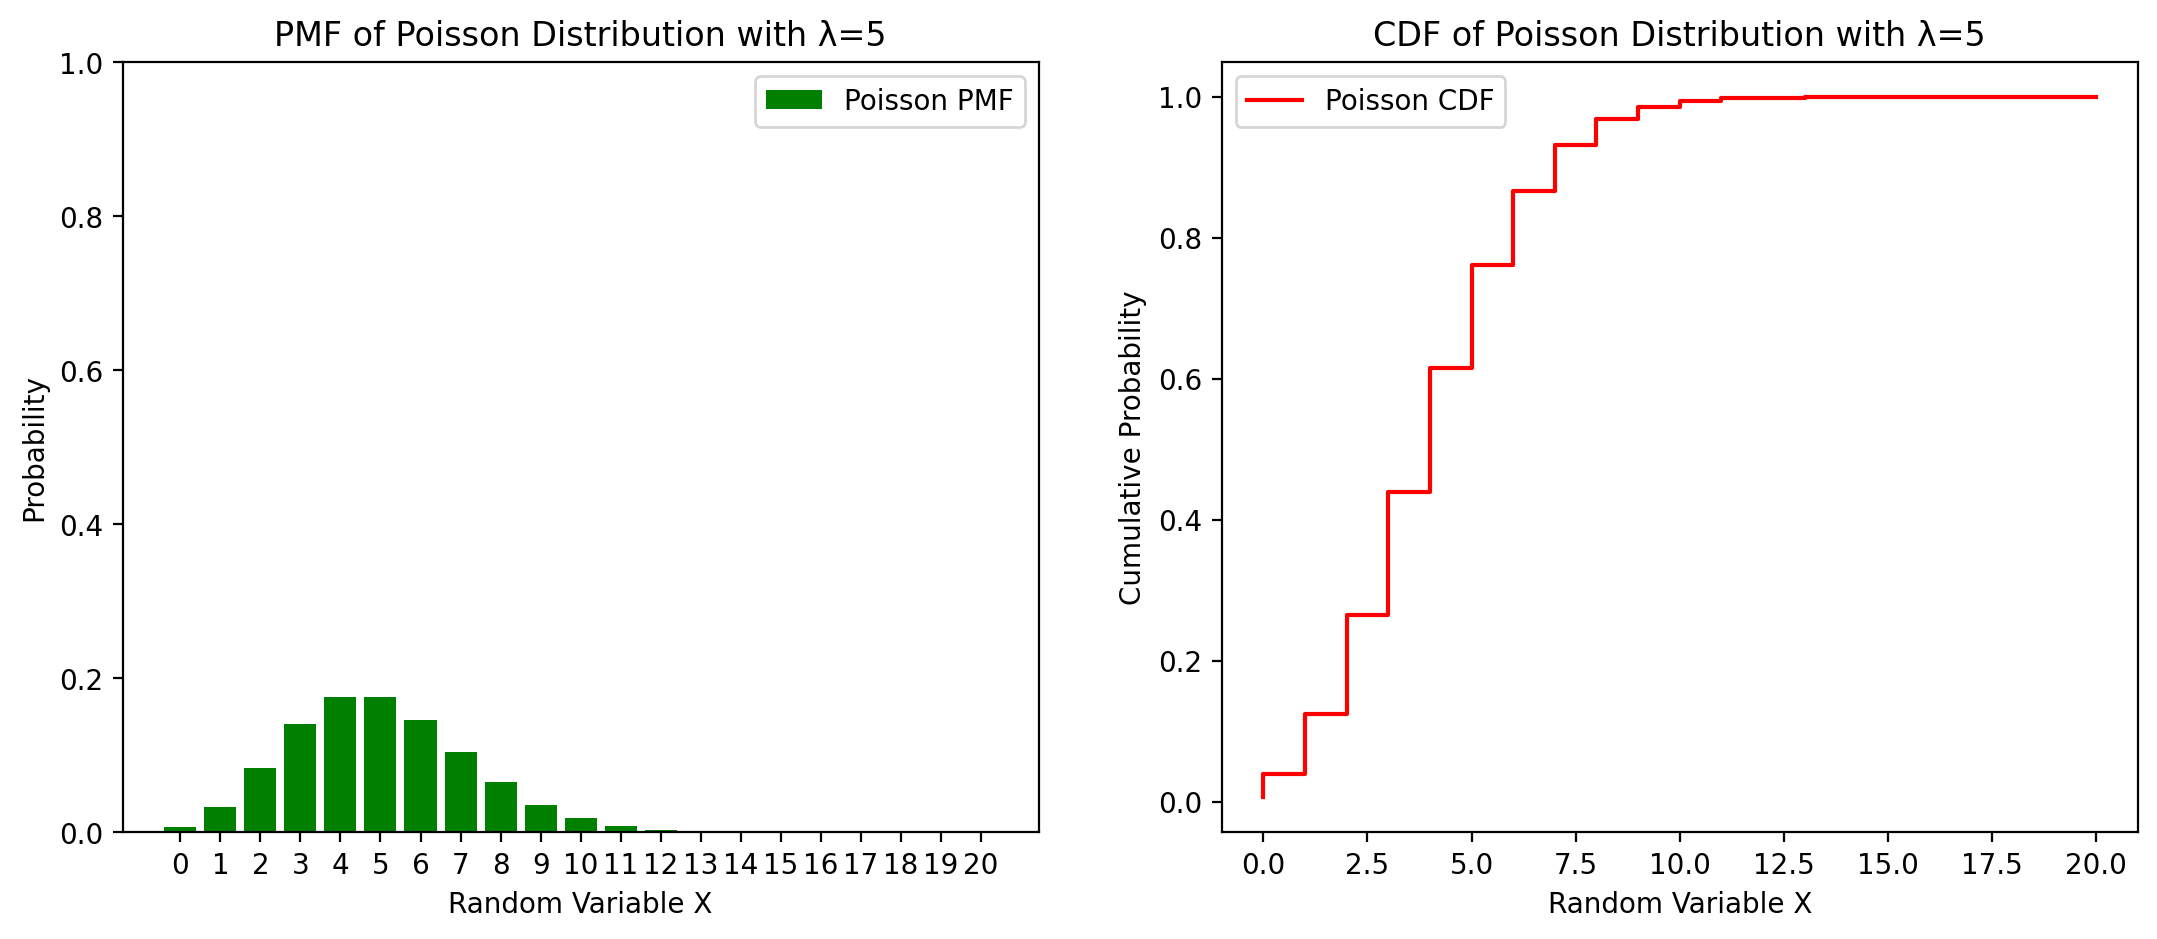

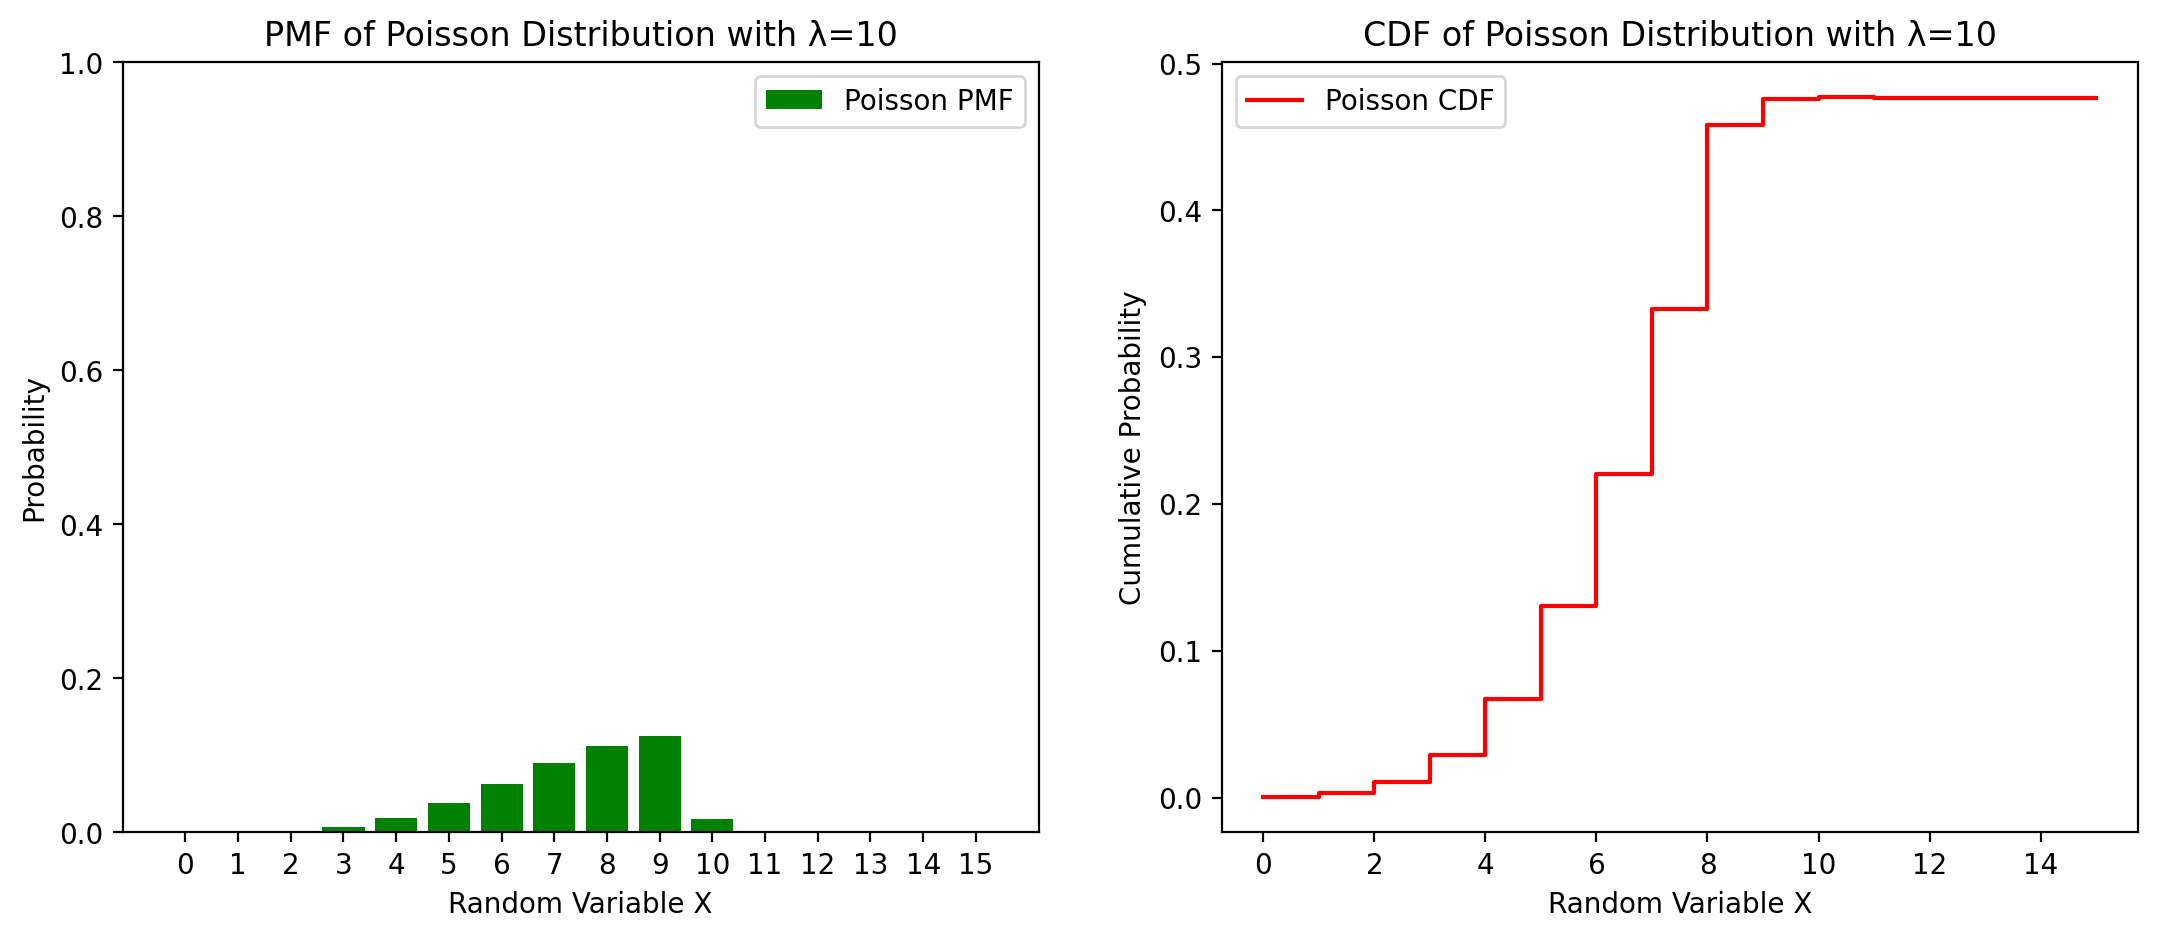

In [19]:
def poisson_prob(lamb,k):
  return np.exp(-lamb)*(lamb**k)/factorial(k)

def poisson_pmf(lamb,k):
  x=np.arange(k+1)
  pmf=[poisson_prob(lamb,i) for i in x]
  return pmf

def poisson_cdf(lamb,k):
  x=np.arange(k+1)
  pmf=[poisson_prob(lamb,i) for i in x]
  cdf=np.cumsum(pmf)
  return cdf

def plot_poisson_pmf_cdf(lamb,k):
  fig, ax = plt.subplots(1, 2, figsize=(13, 5))
  x=np.arange(k+1)
  pmf=[poisson_prob(lamb,i) for i in x]
  ax[0].bar(x, pmf, color="g", label="Poisson PMF")
  ax[0].set_title(f'PMF of Poisson Distribution with λ={lamb}')
  ax[0].set_xlabel('Random Variable X')
  ax[0].set_xticks(x)
  ax[0].set_ylabel('Probability')
  ax[0].set_ylim(0,1)
  ax[0].legend()
  cdf=np.cumsum(pmf)
  ax[1].step(x,cdf, color="r", label="Poisson CDF")
  ax[1].set_title(f'CDF of Poisson Distribution with λ={lamb}')
  ax[1].set_xlabel('Random Variable X')
  ax[1].set_ylabel('Cumulative Probability')
  ax[1].legend()
  plt.show()


plot_poisson_pmf_cdf(5,20)
plot_poisson_pmf_cdf(10,15)

### Geometric Distribution

The **Geometric Distribution** models the number of trials needed to get the first success in a sequence of independent Bernoulli trials, each with probability $p$ of success. The probability mass function (PMF) for a geometric random variable $X$, with parameter $p$, is given by:

$$
p_X(x) = (1 - p)^{x - 1} p \quad \text{for } x = 1, 2, 3, \dots
$$

where $p$ is the probability of success on each trial, and $x$ is the number of trials needed to get the first success.

The **Cumulative Distribution Function (CDF)**, $F_X(x)$, is the probability that the random variable $X$ takes a value less than or equal to $x$. It is given by:

$$
F_X(x) = \sum_{k = 1}^{\lfloor x \rfloor} (1 - p)^{k - 1} p
$$

This simplifies to:

$$
F_X(x) = 1 - (1 - p)^{\lfloor x \rfloor}
$$

This expression represents the CDF of a geometric random variable, which accumulates the probabilities of all trials up to $x$.


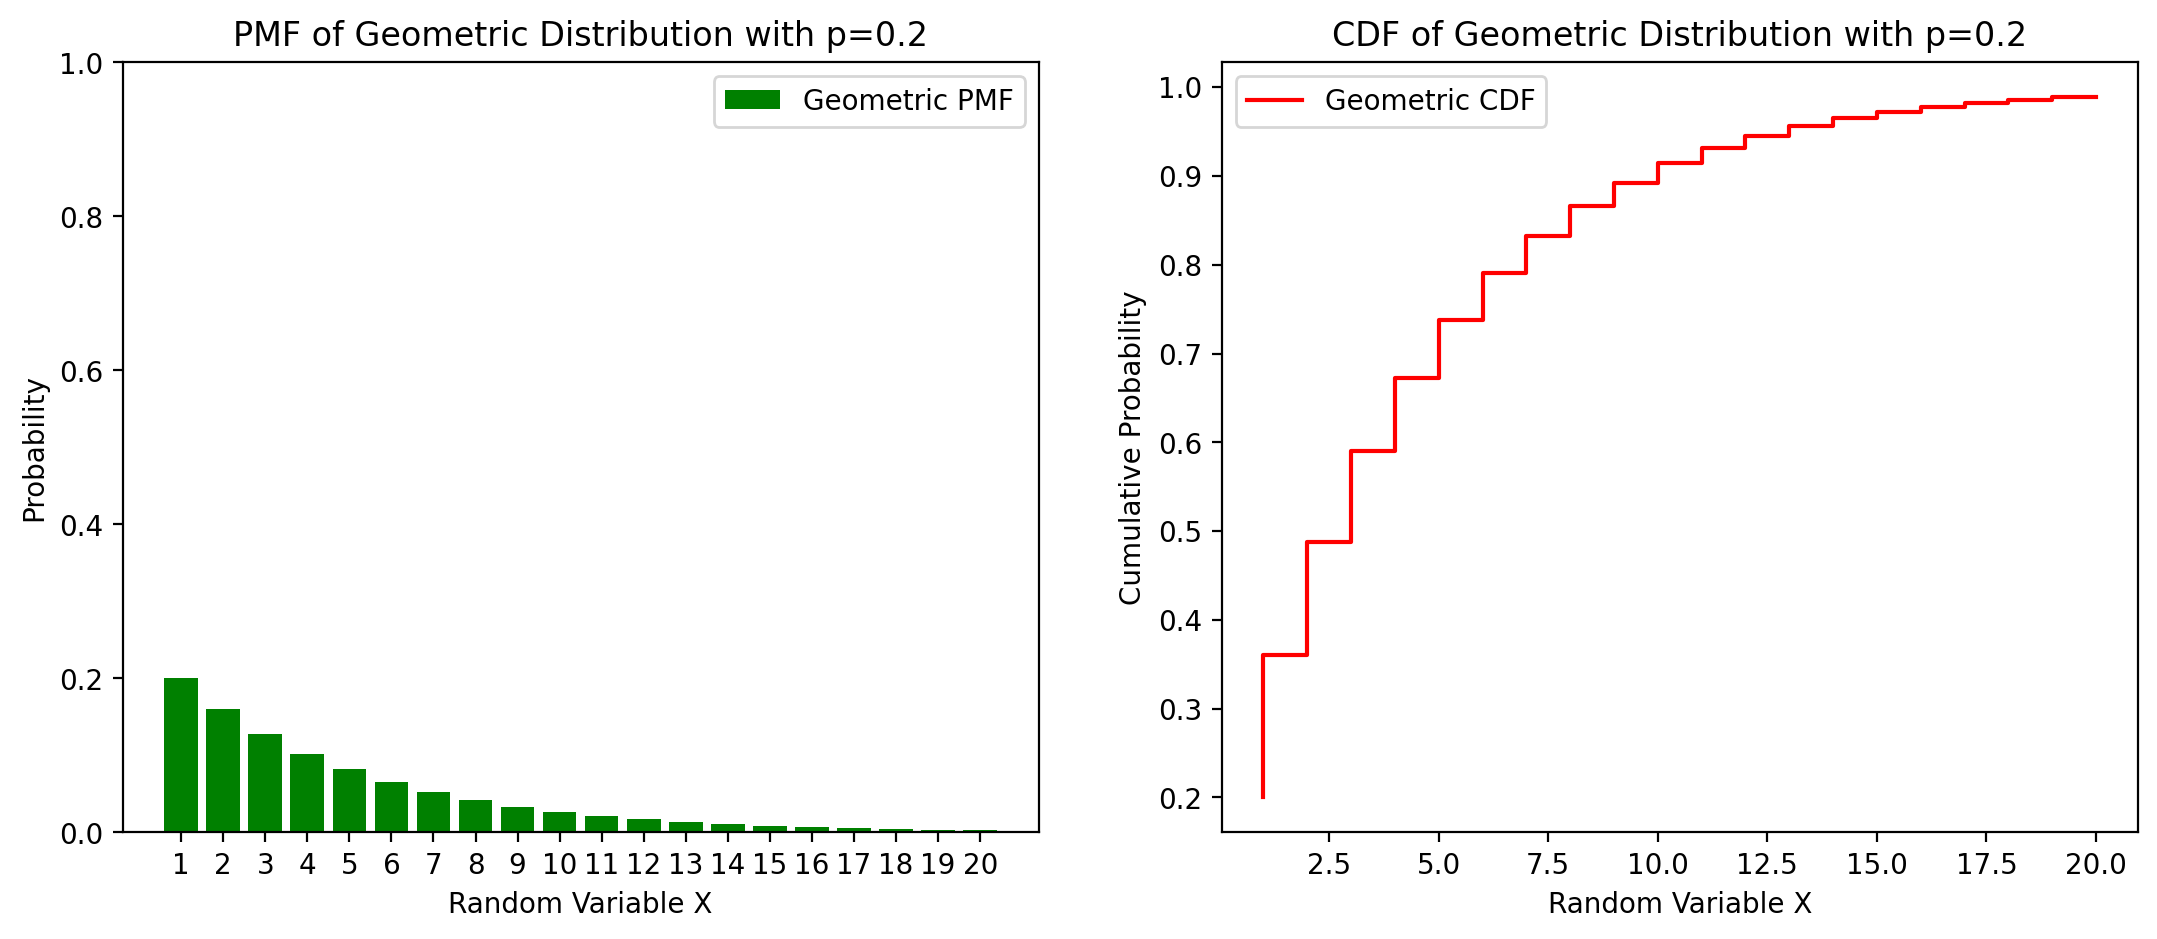

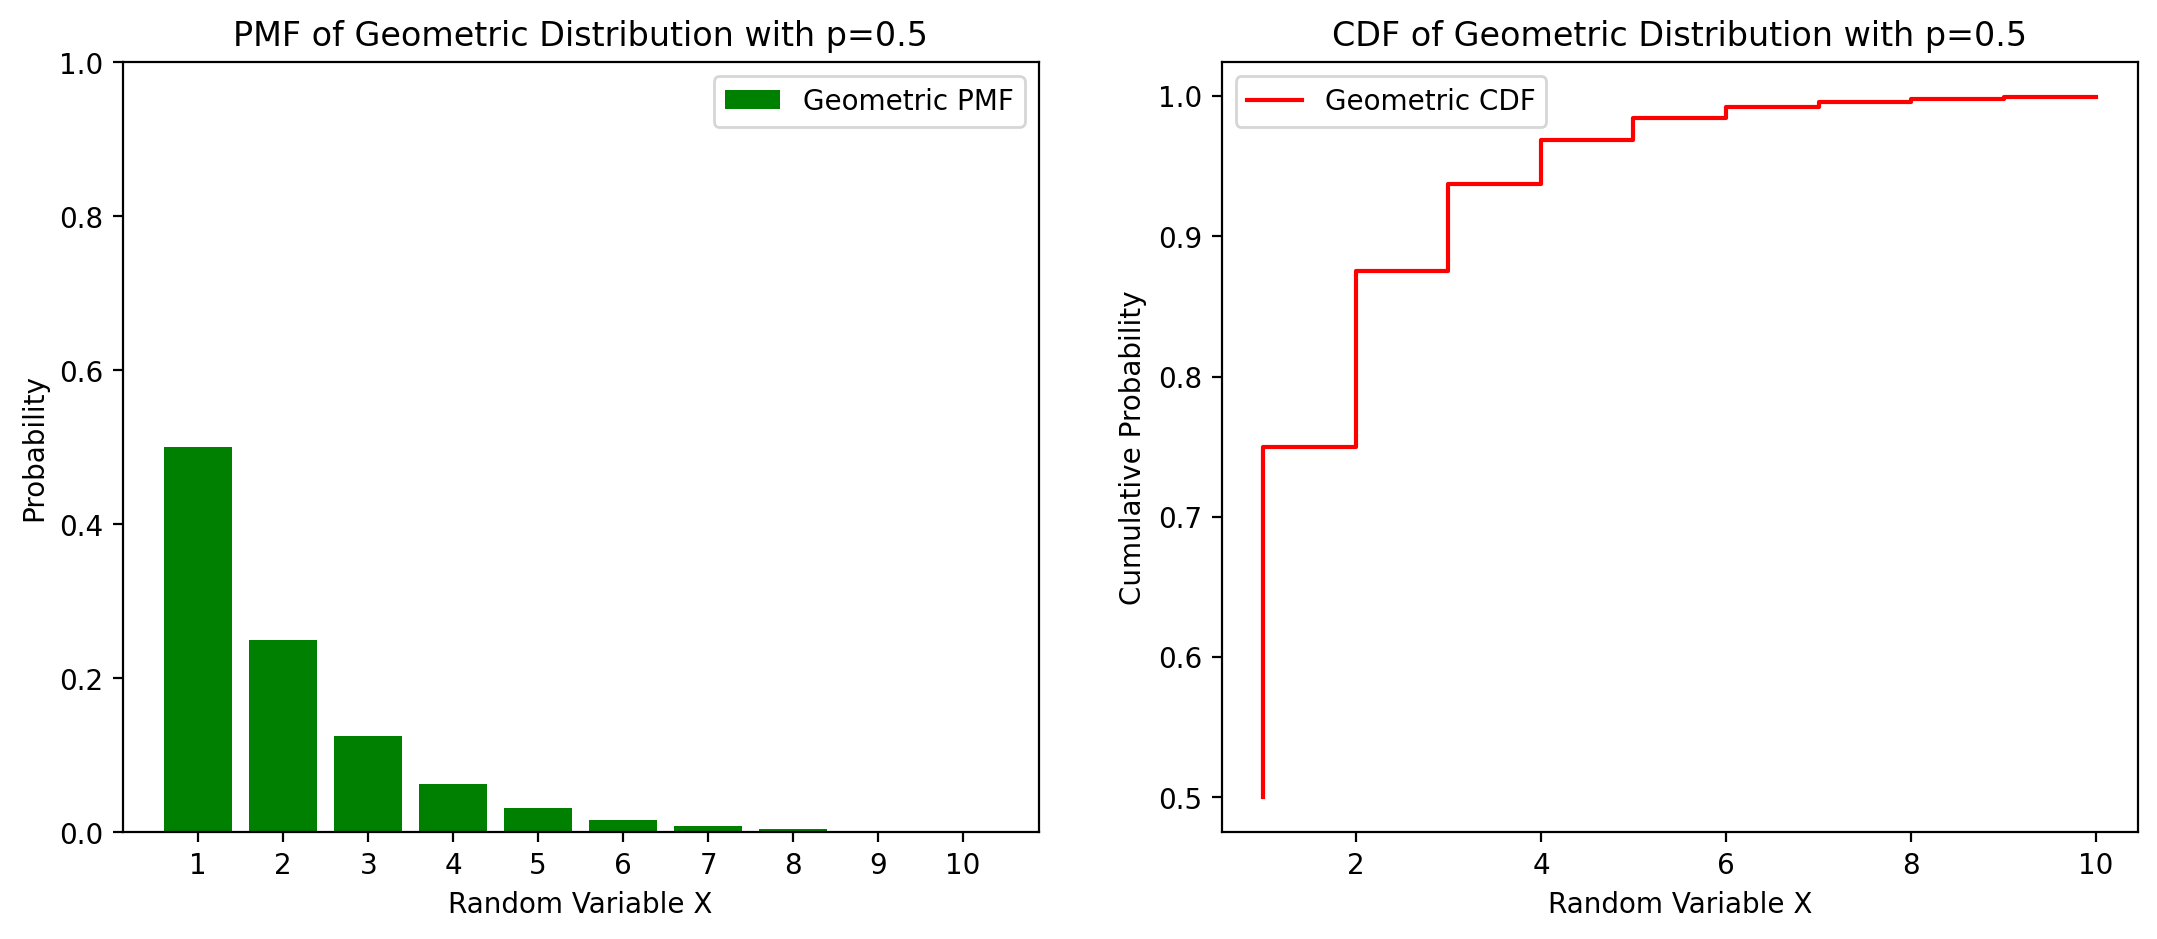

In [20]:
def geomtric_prob(p,k):
  return ((1-p)**(k-1))*p

def geometric_pmf(p,n):
  trials=range(1,n+1)
  pmf=[geomtric_prob(p,i) for i in trials]
  return pmf

def geometric_cdf(p,n):
  trials=range(1,n+1)
  pmf=[geomtric_prob(p,i) for i in trials]
  cdf=np.cumsum(pmf)
  return cdf

def plot_geometric_pmf_cdf(p,n):
  fig, ax = plt.subplots(1, 2, figsize=(13, 5))
  trials=range(1,n+1)
  pmf=[geomtric_prob(p,i) for i in trials]
  ax[0].bar(trials, pmf, color="g", label="Geometric PMF")
  ax[0].set_title(f'PMF of Geometric Distribution with p={p}')
  ax[0].set_xlabel('Random Variable X')
  ax[0].set_xticks(trials)
  ax[0].set_ylabel('Probability')
  ax[0].set_ylim(0,1)
  ax[0].legend()
  cdf=np.cumsum(pmf)
  ax[1].step(trials,cdf, color="r", label="Geometric CDF")
  ax[1].set_title(f'CDF of Geometric Distribution with p={p}')
  ax[1].set_xlabel('Random Variable X')
  ax[1].set_ylabel('Cumulative Probability')
  ax[1].legend()
  plt.show()

plot_geometric_pmf_cdf(0.2,20)
plot_geometric_pmf_cdf(0.5,10)